# **CAPSTONE PROJECT 1 : Credit Card approval prediction**

# **Introduction**

As whole world is heading towards capitalism, expenditure based economies are growing tremendously and with that growing the popularity of credit cards. So to make the process efficient and easy banks needs hand of technology. Machine learning is encompassing all the sectors of human life and is good tool for finance sector also.
  so to help streamline the application process and improve the approval rate,machine learning models can be used to predict credit card approval. In this project, we will explore how various factors affect credit card approval rates and use predictive models to improve the accuracy of credit card approval predictions.

### 1) Why is your proposal important in today’s world? How predicting a good client is worthy for a bank?

A) The proposal to predict credit card approval is highly relevant in today's world due to the increasing use of credit cards as a financial tool. With the rise in e-commerce and online transactions, credit cards have become a primary payment method for many individuals, making it essential for banks to efficiently process credit card applications and improve the approval rate.
  Predicting a good client is essential for a bank because it helps to minimize the risk of credit default and reduce the cost of managing credit card accounts. Banks can use machine learning algorithms to analyze various factors such as  income level, employment status etc. By accurately predicting, banks can offer credit cards to clients with lower risk profiles, which can ultimately lead to better profitability and improved customer satisfaction.

### 2) How is it going to impact the banking sector?

A) predicting credit card approval using machine learning can have a transformative impact on the banking sector by improving the customer experience, reducing risk, and increasing profitability.

**Improved customer experience:** By using predictive models, banks can offer faster and more accurate credit card approvals, which can improve the overall customer experience. This can lead to increased customer satisfaction and loyalty.

**Reduced risk of credit defaults:** Machine learning algorithms can help banks to accurately predict the likelihood of a client defaulting on their credit card payments. By identifying clients with lower credit risk profiles, banks can offer credit cards with lower interest rates, which can reduce the risk of defaults and ultimately improve the bank's profitability.

**Improved profitability:** By reducing the risk of credit defaults and improving the efficiency of the underwriting process, banks can increase their profitability. This can help banks to offer better rates and benefits to their clients, leading to increased market share and revenue.

### 3) If any, what is the gap in the knowledge or how your proposed method can be helpful if required in future for any bank in India.

One gap i can think of is of location. credit card usage is more in certain locations. Had there been location information, it would increased accuracy of the model greatly. So I propose to include location information to help predict the more accurate results in future

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# importing all the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# loading the csv file from local to pandas dataframe

df_cc = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/files/Credit_card.csv')
df_cl = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/files/Credit_card_label.csv')

As tha data is in two different files, we need to merge them on common column. 'Credit_card.csv' contains all the independant columns whereas 'Credit_card_label' has the target column.

In [4]:
df = df_cc.merge(df_cl) # merge() function merges given files. If 'how' is not mentioned by default it merges tables on inner join

# Data understanding

1. Understanding the structure of the data by using head, tail, shape functions

In [5]:
df.head() # head gives specified number of rows from the begining

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [6]:
df.tail() # tail gives specified number of rows starting from last row

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0
1547,5053790,F,Y,Y,0,225000.0,Working,Higher education,Married,House / apartment,-16601.0,-2859,1,0,0,0,NaN,2,0


In [7]:
df.shape # gives count of columns and rows

(1548, 19)

Dataframe consists of 1548 rows and 19 columns

2. Understanding data content using relevant functions

In [8]:
df.info() # gives count of not null values and data type of each column

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [9]:
df.isnull().sum() # gives count of null values for each column

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [10]:
df.describe() # provides statastical measure for the dataset

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
count,1.548000e+03,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499,0.113049
std,4.171759e+04,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772,0.316755
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,5.078842e+06,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000,1.000000


In [11]:
df.describe(include = 'O')  # including 'o' enables statastical measures on columns of object type

,GENDER,Car_Owner,Propert_Owner,Type_Income,EDUCATION,Marital_status,Housing_type,Type_Occupation
count,1541,1548,1548,1548,1548,1548,1548,1060
unique,2,2,2,4,5,5,6,18
top,F,N,Y,Working,Secondary / secondary special,Married,House / apartment,Laborers
freq,973,924,1010,798,1031,1049,1380,268


In [12]:
df[df.duplicated()]  # Finds duplicated values in dataset

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label


Dataset has no duplicates

## Data Preprocessing

1. Dropping the unnecessary columns
    
    with some initial basic analysis , we can assume that columns 'Ind_ID','Mobile_phone', 'Work_Phone', 'Phone', 'EMAIL_ID'  will have no effect on target column.

In [13]:
# dropping unnecessary column
df1 = df.drop(columns = ['Ind_ID','Mobile_phone', 'Work_Phone', 'Phone', 'EMAIL_ID'], axis = 1)

In [14]:
df1.head()

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Type_Occupation,Family_Members,label
0,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,NaN,2,1
1,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,NaN,2,1
2,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,NaN,2,1
3,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,NaN,2,1
4,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,NaN,2,1


It can be observed that columns 'Birthday_count', 'Employed_days' contain values in days and have negative values. We need to make all values positive and convert it to years for better understanding

In [15]:
# coverting days in birthday_count to years
df1['Birthday_count'] = df1['Birthday_count'].abs()/365

In [16]:
# converting experience into years
df1['Employed_days'] = df1['Employed_days'].apply(lambda x: 0 if x > 0 else -x/365)

In [17]:
# renaming columns

df1.rename(columns = {'Employed_days':'Employed_years', 'Birthday_count' : 'Age'}, inplace = True)

In [18]:
df1.head()

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Age,Employed_years,Type_Occupation,Family_Members,label
0,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51.430137,0.000000,NaN,2,1
1,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.142466,1.605479,NaN,2,1
2,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,1.605479,NaN,2,1
3,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,37.142466,1.605479,NaN,2,1
4,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.142466,1.605479,NaN,2,1


2. Finding if features have outliers and removing them


There are 5 numerical columns in the dataframe: 'CHILDREN', 'Employed_years', 'Annual_income', 'Age', 'Family_Members'

We will find out if they have outliers or not

In [19]:
# importing warning library to ignore all the warnings

import warnings
warnings.filterwarnings("ignore")

<Axes: xlabel='Family_Members', ylabel='Count'>

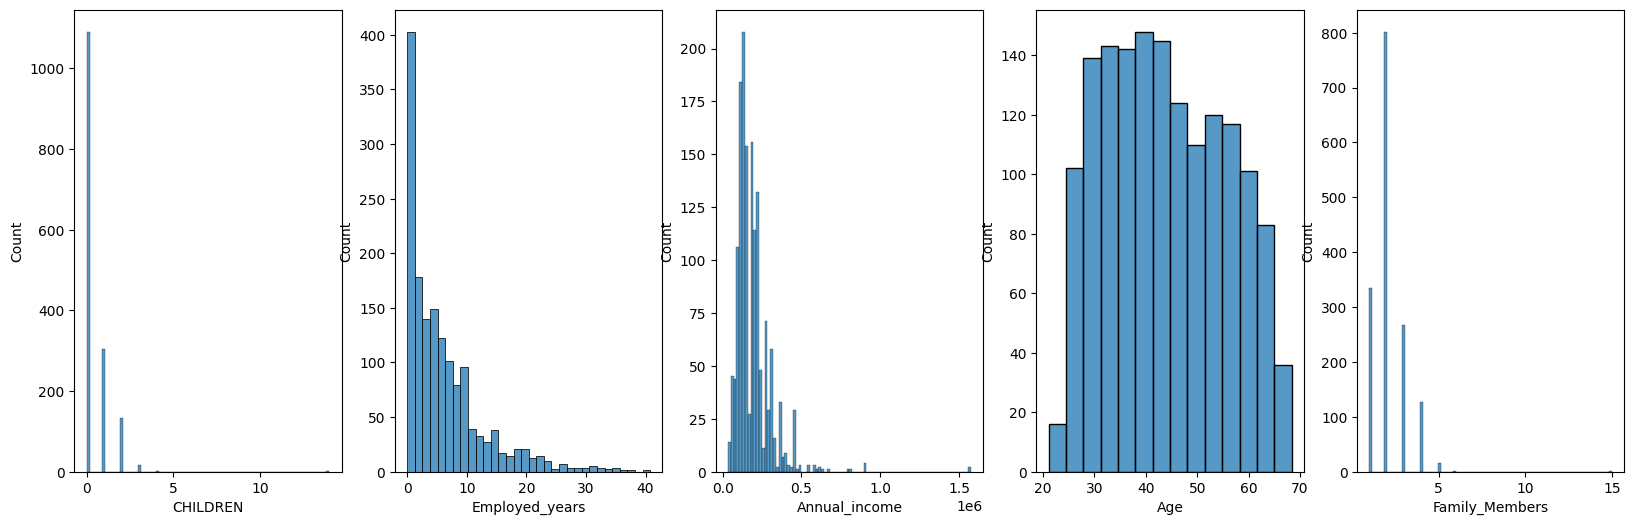

In [20]:
# Plotting histogram to analyse distribution of each column

plt.figure(figsize=(20,6))                     # Using figsize we can set the size of the plots
plt.subplot(1,5,1)                             # Subplot enables us to plot many graphs at one place. Here we are plotting graphs with 1 row and 5 columns
sns.histplot(x = df1["CHILDREN"])              # histogram for "CHILDREN" column using seaborn
plt.subplot(1,5,2)
sns.histplot(x = df1["Employed_years"])        # histogram for "Employed_years" column using seaborn
plt.subplot(1,5,3)
sns.histplot(x = df1["Annual_income"])         # histogram for "Annual_income" column using seaborn
plt.subplot(1,5,4)
sns.histplot(x = df1["Age"])                   # histogram for "Age" column using seaborn
plt.subplot(1,5,5)
sns.histplot(x = df1["Family_Members"])        # histogram for "Family_Members" column using seaborn

The above histograms are for columns 'CHILDREN', 'Employed_years', 'Annual_income', 'Age', 'Family_Members'.
We can observe that the distribution for 'CHILDREN', 'Employed_years' and 'Annual_income'  columns is right skewd. So they must have outliers.
We can confirm this using boxplot



<Axes: xlabel='Family_Members'>

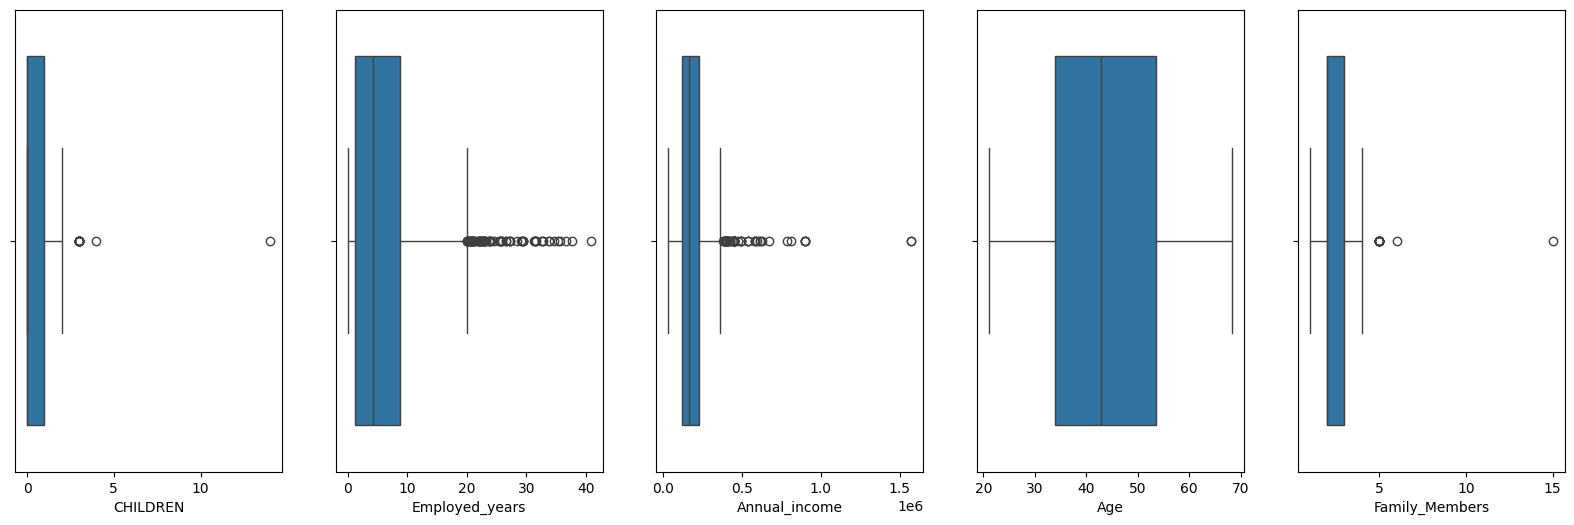

In [21]:
# Plotting Boxplot for each column

plt.figure(figsize=(20,6))
plt.subplot(1,5,1)
sns.boxplot(x = df1["CHILDREN"])             # boxplot for "CHILDREN" column using seaborn
plt.subplot(1,5,2)
sns.boxplot(x = df1["Employed_years"])       # boxplot for "Employed_years" column using seaborn
plt.subplot(1,5,3)
sns.boxplot(x = df1["Annual_income"])        # boxplot for "Annual_income" column using seaborn
plt.subplot(1,5,4)
sns.boxplot(x = df1["Age"])                  # boxplot for "Age" column using seaborn
plt.subplot(1,5,5)
sns.boxplot(x = df1["Family_Members"])       # boxplot for "Family_Members" column using seaborn


Above plot shows outliers are present for columns ''Employed_years', 'Annual_income', and 'Family_members'
To remove the outliers we will exercise following steps:

1. We will create copy of the original dataframe

In [22]:
df_outlier = df1.copy()  # creating a deep copy of original dataframe

2. Using describe function, we are going to obtain values of first quartile and third quartile for each column using describe function

In [23]:
# finding first quartile and third quartile for 'CHILDREN' column
Q1_CH = df_outlier['CHILDREN'].describe()['25%']
Q3_CH = df_outlier['CHILDREN'].describe()['75%']

# finding first quartile and third quartile for 'Employed_years' column
Q1_EY = df_outlier['Employed_years'].describe()['25%']
Q3_EY = df_outlier['Employed_years'].describe()['75%']

# finding first quartile and third quartile for 'Annual_income' column
Q1_AI = df_outlier['Annual_income'].describe()['25%']
Q3_AI = df_outlier['Annual_income'].describe()['75%']

# finding first quartile and third quartile for 'Family_Members' column
Q1_FM = df_outlier['Family_Members'].describe()['25%']
Q3_FM = df_outlier['Family_Members'].describe()['75%']

3. Defining the Inter Quartile Range and calculating the lower and upper limit

In [24]:
# Defining Inter Quartile Range and calculating the lower and upper limit for 'CHILDREN' column
IQR_CH = Q3_CH - Q1_CH
upper_limit_CH = Q3_CH + 1.5*IQR_CH
lower_limit_CH = Q1_CH - 1.5*IQR_CH

# Defining Inter Quartile Range and calculating the lower and upper limit for 'Employed_years' column
IQR_EY = Q3_EY - Q1_EY
upper_limit_EY = Q3_EY + 1.5*IQR_EY
lower_limit_EY = Q1_EY - 1.5*IQR_EY

# Defining Inter Quartile Range and calculating the lower and upper limit for 'Annual_income' column
IQR_AI = Q3_AI - Q1_AI
upper_limit_AI = Q3_AI + 1.5*IQR_AI
lower_limit_AI = Q1_AI - 1.5*IQR_AI

# Defining Inter Quartile Range and calculating the lower and upper limit for 'Family_Members' column
IQR_FM = Q3_FM - Q1_FM
upper_limit_FM = Q3_FM + 1.5*IQR_FM
lower_limit_FM = Q1_FM - 1.5*IQR_FM

4. Now we are going to use clip function to replace outliers with the values within specified range

In [25]:
# Clipping values for 'CHILDREN' column
df1['CHILDREN'] = df1['CHILDREN'].clip(upper_limit_CH, lower_limit_CH )

# Clipping values for 'Employed_years' column
df1['Employed_years'] = df1['Employed_years'].clip(upper_limit_EY, lower_limit_EY )

# Clipping values for 'Annual_income' column
df1['Annual_income'] = df1['Annual_income'].clip(upper_limit_AI, lower_limit_AI )

# Clipping values for 'Family_Members' column
df1['Family_Members'] = df1['Family_Members'].clip(upper_limit_FM, lower_limit_FM )

5. Now checking if outliers has been removed or not

<Axes: xlabel='Family_Members'>

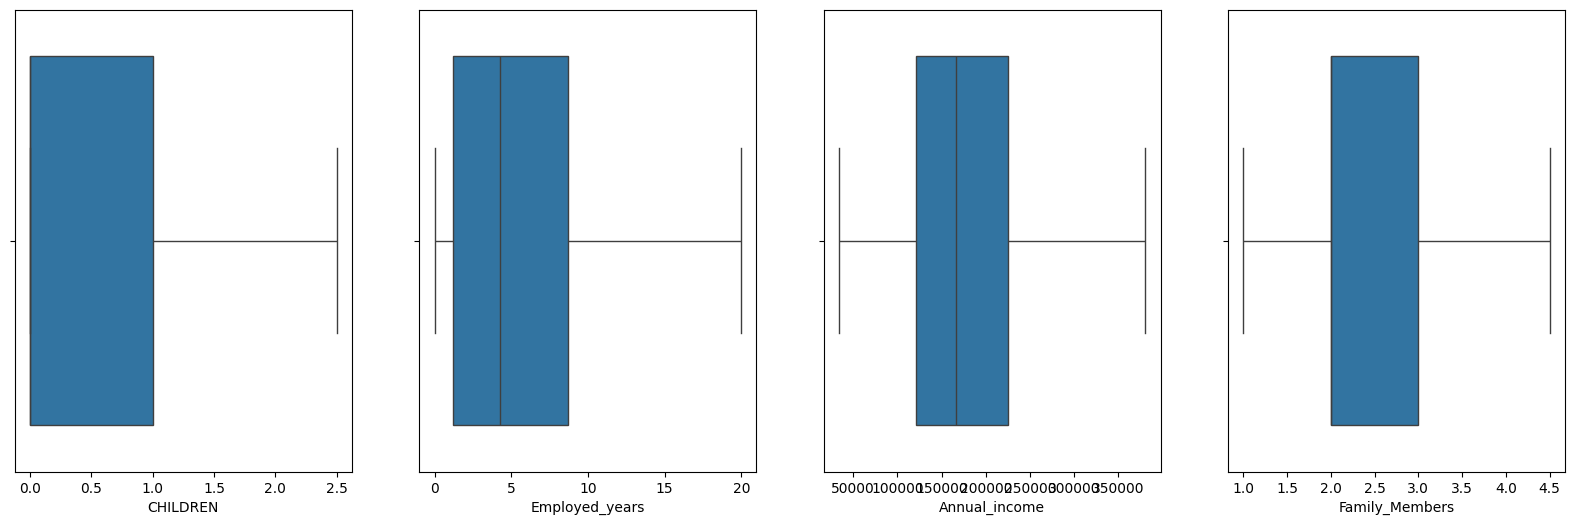

In [26]:
plt.figure(figsize=(20,6))
plt.subplot(1,4,1)
sns.boxplot(x = df1["CHILDREN"])
plt.subplot(1,4,2)
sns.boxplot(x = df1["Employed_years"])
plt.subplot(1,4,3)
sns.boxplot(x = df1["Annual_income"])
plt.subplot(1,4,4)
sns.boxplot(x = df1["Family_Members"])

from the above boxplot we can observe that outliers has been removed for all the columns

In [27]:
df1

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Age,Employed_years,Type_Occupation,Family_Members,label
0,M,Y,Y,0.0,180000.0,Pensioner,Higher education,Married,House / apartment,51.430137,0.000000,NaN,2.0,1
1,F,Y,N,0.0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.142466,1.605479,NaN,2.0,1
2,F,Y,N,0.0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,1.605479,NaN,2.0,1
3,F,Y,N,0.0,NaN,Commercial associate,Higher education,Married,House / apartment,37.142466,1.605479,NaN,2.0,1
4,F,Y,N,0.0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.142466,1.605479,NaN,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,F,N,Y,0.0,NaN,Commercial associate,Higher education,Married,House / apartment,32.758904,5.978082,Managers,2.0,0
1544,F,N,N,0.0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,28.024658,3.312329,Accountants,1.0,0
1545,M,Y,Y,2.0,180000.0,Working,Higher education,Married,House / apartment,36.093151,6.786301,Managers,4.0,0
1546,M,Y,N,0.0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,41.895890,1.767123,Drivers,2.0,0


### dealing with null values

Now we will start filling NaN values with either mean, median or mode

In [28]:
df1.isnull().sum() # checking null values in the dataframe


GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Age                 22
Employed_years       0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

There are 4 columns with null values.

For 'GENDER' column there are 7 null values and the column is of object type. So we are going to fill null values with mode

In [29]:
df1['GENDER'] = df1['GENDER'].fillna(df1['GENDER'].mode()[0]) # Filling null values with mode

As 'Annual_income' is numerical column, the null values needs to be filled with either mean or median. We will first fill null values with mean and then with median and will check the change in the distribution.

In [30]:
# creating new dataframes for mean and median
df_mean = df1.copy()   # creating deep copy of original dataframe for mean
df_median = df1.copy() # creating deep copy of original dataframe for median

In [31]:
# filling missing values with mean
df_mean['Annual_income'] = df_mean['Annual_income'].fillna(df_mean['Annual_income'].mean())

# filling missing values with median
df_median['Annual_income'] = df_median['Annual_income'].fillna(df_mean['Annual_income'].median())

In [32]:
# checking if values has been filled for mean

df_mean.isnull().sum()

GENDER               0
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income        0
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Age                 22
Employed_years       0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

Here we can see no null values for 'Annual_income' when filled with mean

In [33]:
# checking if values has been filled for median

df_median.isnull().sum()

GENDER               0
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income        0
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Age                 22
Employed_years       0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

Here we can see no null values for 'Annual_income' when filled with median

Now we are going to investigate which one has similar distribution to the original column using distplots

<Axes: ylabel='Density'>

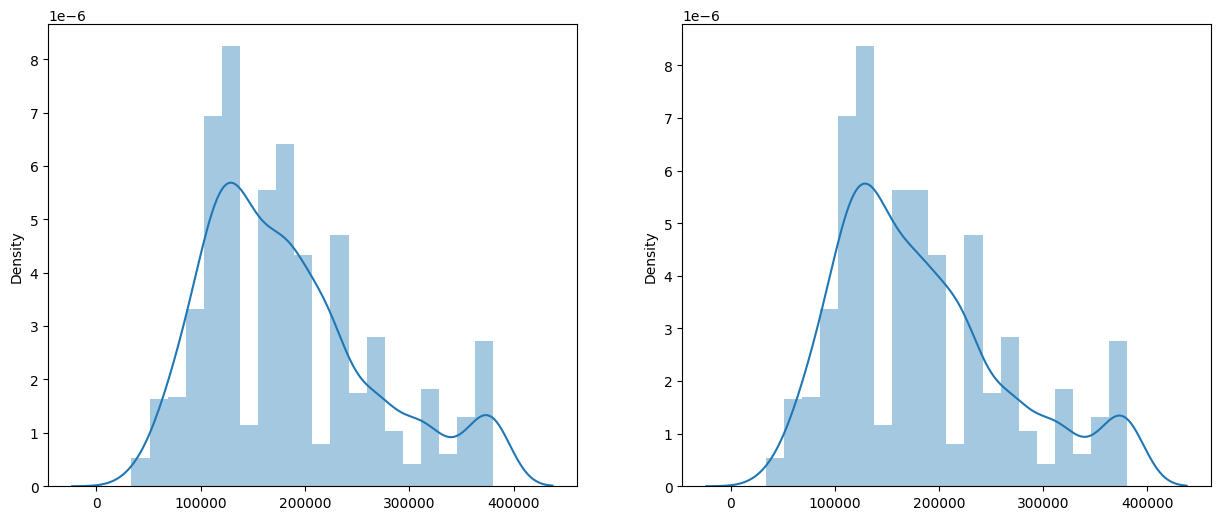

In [34]:
# comparing distribution of df_mean with original df1

plt.figure(figsize=(15,6))                   # setting size of the plot
plt.subplot(1,2,1)                           # subplot is used to plot multiple plots
sns.distplot(x = df_mean["Annual_income"])   # Plotting distplot for 'Annual_income' after filling values with mean
plt.subplot(1,2,2)
sns.distplot(x = df1["Annual_income"])       # Plotting distplot for original 'Annual_income' column

<Axes: ylabel='Density'>

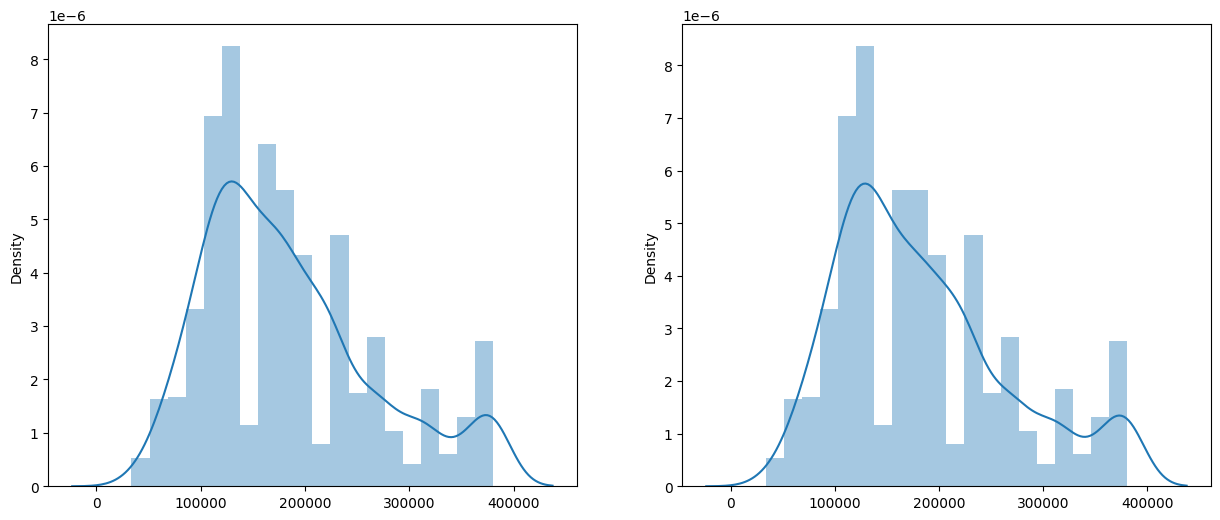

In [35]:
# comparing distribution of df_median with original df1

plt.figure(figsize=(15,6))                   # setting size of the plot
plt.subplot(1,2,1)                           # subplot is used to plot multiple plots
sns.distplot(x = df_median["Annual_income"]) # Plotting distplot for 'Annual_income' after filling values with median
plt.subplot(1,2,2)
sns.distplot(x = df1["Annual_income"])       # Plotting distplot for original 'Annual_income' column

By observing above graphs we can conclude that the distribution with null values filled with median is more identical to the distribution of original column. So we are going to fill null values with median

In [36]:
# filling null values of 'Annual_income' with median

df1["Annual_income"] = df1["Annual_income"].fillna(df1["Annual_income"].median())

In [37]:
# checking if the null values has been replaced
df1.isnull().sum()

GENDER               0
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income        0
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Age                 22
Employed_years       0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

As we can observe, there are no null values for 'Annual_income'

To fill the null values in 'Age' column we are going to repeat the same procedure that was done for 'Annual_income' column as both are numerical data types. For this pusrpose we are going to use same mean and median dataframes

In [38]:
# filling missing values with mean
df_mean['Age'] = df_mean['Age'].fillna(df_mean['Age'].mean())

# filling missing values with median
df_median['Age'] = df_median['Age'].fillna(df_median['Age'].median())

In [39]:
# checking if values has been filled for mean

df_mean.isnull().sum()

GENDER               0
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income        0
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Age                  0
Employed_years       0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [40]:
# checking if values has been filled for median

df_median.isnull().sum()

GENDER               0
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income        0
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Age                  0
Employed_years       0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

We can observe that there are no null values for 'Age'

<Axes: ylabel='Density'>

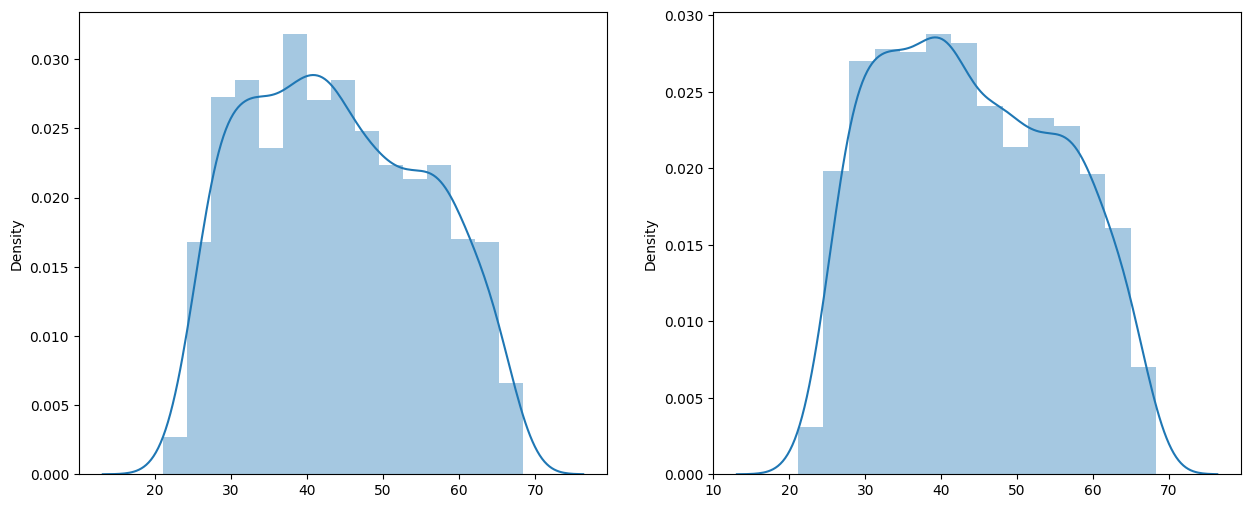

In [41]:
# comparing distribution of df_mean with original df1

plt.figure(figsize=(15,6))                   # setting size of the plot
plt.subplot(1,2,1)                           # subplot is used to plot multiple plots
sns.distplot(x = df_mean["Age"])             # Plotting distplot for 'Age' after filling values with mean
plt.subplot(1,2,2)
sns.distplot(x = df1["Age"])                 # Plotting distplot for original 'Age' column

<Axes: ylabel='Density'>

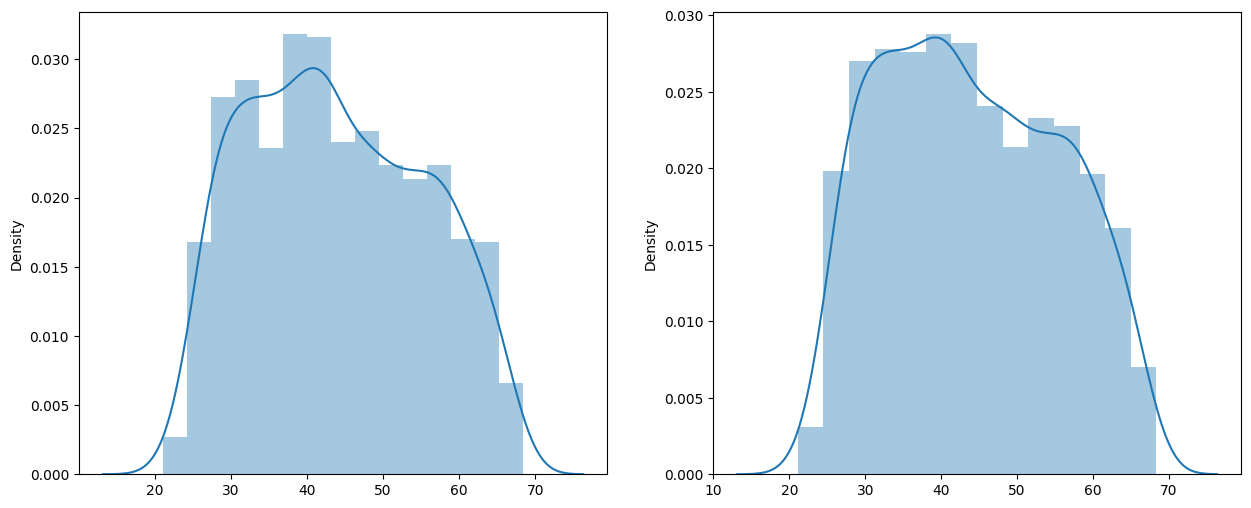

In [42]:
# comparing distribution of df_mean with original df1

plt.figure(figsize=(15,6))                   # setting size of the plot
plt.subplot(1,2,1)                           # subplot is used to plot multiple plots
sns.distplot(x = df_median["Age"])           # Plotting distplot for 'Age' after filling values with median
plt.subplot(1,2,2)
sns.distplot(x = df1["Age"])                 # Plotting distplot for original 'Age' column

In [43]:
m  = df1['Age'].mean()
md = df1['Age'].median()


print('mean :',m ,'\nmedian :',md)


mean : 43.94614265965278 
median : 42.90821917808219


we can observe that the mean and median for age column are almost same, we replace null values with either of them.

So we are going to fill null values for 'Age' column with mean

In [44]:
# filling null values of 'Age' with median

df1['Age'] = df1['Age'].fillna(df1['Age'].mean())

In [45]:
# checking if the null values has been replaced
df1.isnull().sum()

GENDER               0
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income        0
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Age                  0
Employed_years       0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

We can see that there are no null values for 'Age'

The only remaining column with null values is 'Type_Occupation'. It has significant amount of null values i.e. 488. But we can not drop this column as this column should have good correlation with target column.
    As it is categorical column we are going to fill null values by one more category that is 'Not_Specified'.

In [46]:
df1['Type_Occupation'].unique()

array([nan, 'Core staff', 'Cooking staff', 'Laborers', 'Sales staff',
       'Accountants', 'High skill tech staff', 'Managers',
       'Cleaning staff', 'Drivers', 'Low-skill Laborers', 'IT staff',
       'Waiters/barmen staff', 'Security staff', 'Medicine staff',
       'Private service staff', 'HR staff', 'Secretaries',
       'Realty agents'], dtype=object)

In [47]:
df1['Type_Occupation'] = df1['Type_Occupation'].fillna('Not_Specified')

In [48]:
df1['Type_Occupation'].value_counts()

Not_Specified            488
Laborers                 268
Core staff               174
Managers                 136
Sales staff              122
Drivers                   86
High skill tech staff     65
Medicine staff            50
Accountants               44
Security staff            25
Cleaning staff            22
Cooking staff             21
Private service staff     17
Low-skill Laborers         9
Secretaries                9
Waiters/barmen staff       5
HR staff                   3
IT staff                   2
Realty agents              2
Name: Type_Occupation, dtype: int64

We can observe that null values got converted to 'Not_Specified' category

In [49]:
# checking if there are any null values

df1.isnull().sum()


GENDER             0
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income      0
Type_Income        0
EDUCATION          0
Marital_status     0
Housing_type       0
Age                0
Employed_years     0
Type_Occupation    0
Family_Members     0
label              0
dtype: int64

Now the dataframe has no null values.

# **DATA ANALYSIS APPROACH**

**Initial/Null Hypothesis:**
Column 'Annual_income' should have strong relationship with 'label' column.

Hypothesis is based on thought that more the annual income less is the probability of default.
We will try to validate the hypothesis by EDA.
As 'Annual_income and 'label' are the numerical columns we will try to find out relationship with linechart and scatterplot. We will also analyze other variable affecting target variable and relationship between independent variables with suitable graphs.

# **Exploratory Data Analysis (EDA)**

In [50]:
df_corr = df1.corr(method='spearman')
df_corr

,CHILDREN,Annual_income,Age,Employed_years,Family_Members,label
CHILDREN,1.000000,0.065604,-0.337389,0.168289,0.814578,-0.016277
Annual_income,0.065604,1.000000,-0.110897,0.169385,0.041009,0.005971
Age,-0.337389,-0.110897,1.000000,-0.215613,-0.277261,0.045045
Employed_years,0.168289,0.169385,-0.215613,1.000000,0.191608,-0.104748
Family_Members,0.814578,0.041009,-0.277261,0.191608,1.000000,-0.026481
label,-0.016277,0.005971,0.045045,-0.104748,-0.026481,1.000000


# 1. Univariate analysis

In [51]:
df1.shape

(1548, 14)

In [52]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GENDER           1548 non-null   object 
 1   Car_Owner        1548 non-null   object 
 2   Propert_Owner    1548 non-null   object 
 3   CHILDREN         1548 non-null   float64
 4   Annual_income    1548 non-null   float64
 5   Type_Income      1548 non-null   object 
 6   EDUCATION        1548 non-null   object 
 7   Marital_status   1548 non-null   object 
 8   Housing_type     1548 non-null   object 
 9   Age              1548 non-null   float64
 10  Employed_years   1548 non-null   float64
 11  Type_Occupation  1548 non-null   object 
 12  Family_Members   1548 non-null   float64
 13  label            1548 non-null   int64  
dtypes: float64(5), int64(1), object(8)
memory usage: 181.4+ KB


In [53]:
# we are going to change the types of columns 'CHILDREN' and 'FAMILY_MEMBERS' to integers

df1['CHILDREN'] = df1['CHILDREN'].astype(int)
df1['Family_Members'] = df1['Family_Members'].astype(int)


We can observe that there are 6 columns  with numerical data type and 8 columns with categorical data. We can further classify as follow:

**Continuous numerical columns:**
*'Annual_income', 'Age', 'Employed_years*

**Discrete numerical columns:**
*'CHILDREN', 'Family_Members', 'label'*

**Nominal categorical columns:**
*'GENDER', 'Car_Owner', 'Property_Owner', 'Type_Income', 'Marital_status', 'Housing_type', 'Type_Occupation,*

**Ordinal categorical columns:**
*'EDUCATION'*

We are going to plot histogram for continuous numerical columns and countplot for discrete/categorical datatypes

<Axes: xlabel='Age', ylabel='Count'>

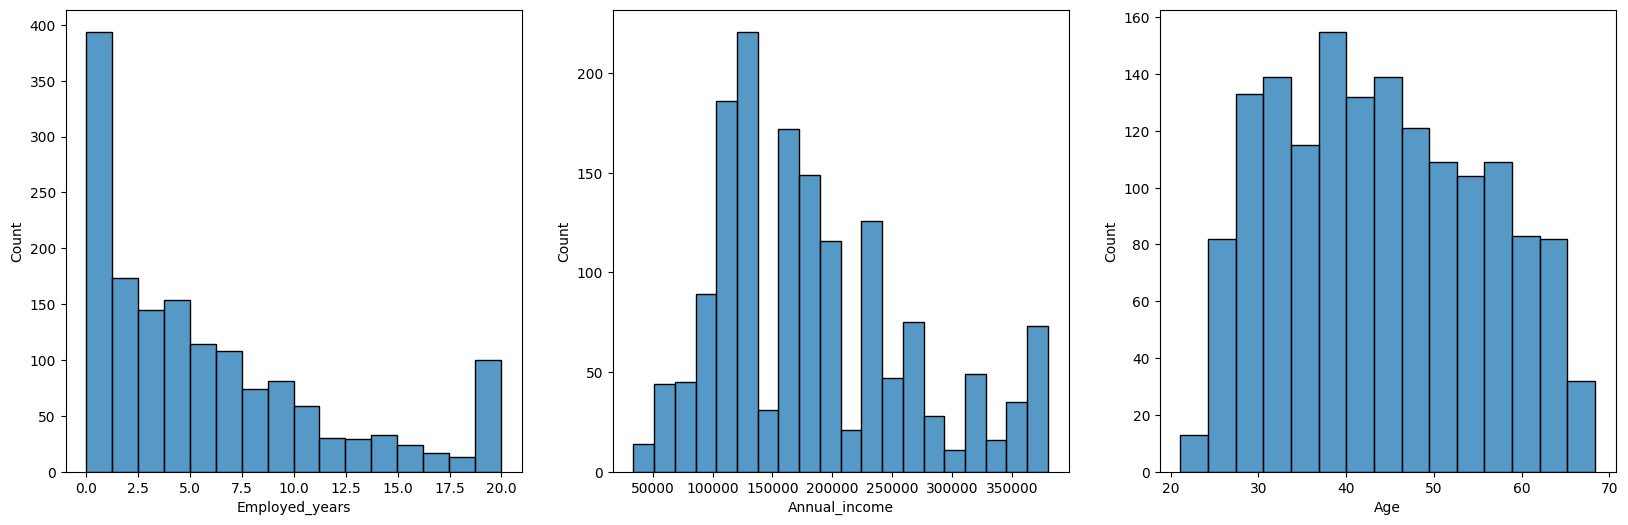

In [54]:
# Plotting histogram to analyse distribution of continuous numerical columns

plt.figure(figsize=(20,6))                     # Using figsize we can set the size of the plots
plt.subplot(1,3,1)                             # Subplot enables us to plot many graphs at one place. Here we are plotting graphs with 1 row and 5 columns
sns.histplot(x = df1["Employed_years"])        # histogram for "Employed_years" column using seaborn
plt.subplot(1,3,2)
sns.histplot(x = df1["Annual_income"])         # histogram for "Annual_income" column using seaborn
plt.subplot(1,3,3)
sns.histplot(x = df1["Age"])                   # histogram for "Age" column using seaborn


As we have already removed outliers from the numerical columns, we can say that the distrbution for all the columns is multimodal and symetrical

In [55]:
df1.describe()

,CHILDREN,Annual_income,Age,Employed_years,Family_Members,label
count,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,0.393411,184167.456395,43.946143,5.794371,2.143411,0.113049
std,0.659774,82261.824264,11.504990,5.713736,0.860752,0.316755
min,0.000000,33750.000000,21.109589,0.000000,1.000000,0.000000
25%,0.000000,121500.000000,34.200000,1.182877,2.000000,0.000000
50%,0.000000,166500.000000,43.327397,4.287671,2.000000,0.000000
75%,1.000000,225000.000000,53.358904,8.697260,3.000000,0.000000
max,2.000000,380250.000000,68.345205,19.968836,4.000000,1.000000


In [56]:
# finding the count of values in the discrete numerical column
for col in df1:
  if df1[col].dtype == 'int':
    print(col,'\n'+str(df1[col].value_counts()))
    print('----------------------')

CHILDREN 
0    1091
1     305
2     152
Name: CHILDREN, dtype: int64
----------------------
Family_Members 
2    802
1    334
3    268
4    144
Name: Family_Members, dtype: int64
----------------------
label 
0    1373
1     175
Name: label, dtype: int64
----------------------


We can see that 'CHILDREN' column is dominated by 0's;
In 'Family_Members' column 2 is the value that occurs maximum number of times;
From lable column we can say that most of the application are approved.

In [57]:
# Finding value counts for categorical columns

for col in df1:
  if df1[col].dtype == 'object':
    print(col,'\n'+str(df1[col].value_counts()))
    print('----------------------')

GENDER 
F    980
M    568
Name: GENDER, dtype: int64
----------------------
Car_Owner 
N    924
Y    624
Name: Car_Owner, dtype: int64
----------------------
Propert_Owner 
Y    1010
N     538
Name: Propert_Owner, dtype: int64
----------------------
Type_Income 
Working                 798
Commercial associate    365
Pensioner               269
State servant           116
Name: Type_Income, dtype: int64
----------------------
EDUCATION 
Secondary / secondary special    1031
Higher education                  426
Incomplete higher                  68
Lower secondary                    21
Academic degree                     2
Name: EDUCATION, dtype: int64
----------------------
Marital_status 
Married                 1049
Single / not married     227
Civil marriage           101
Separated                 96
Widow                     75
Name: Marital_status, dtype: int64
----------------------
Housing_type 
House / apartment      1380
With parents             80
Municipal apartment      53

<Axes: xlabel='label', ylabel='count'>

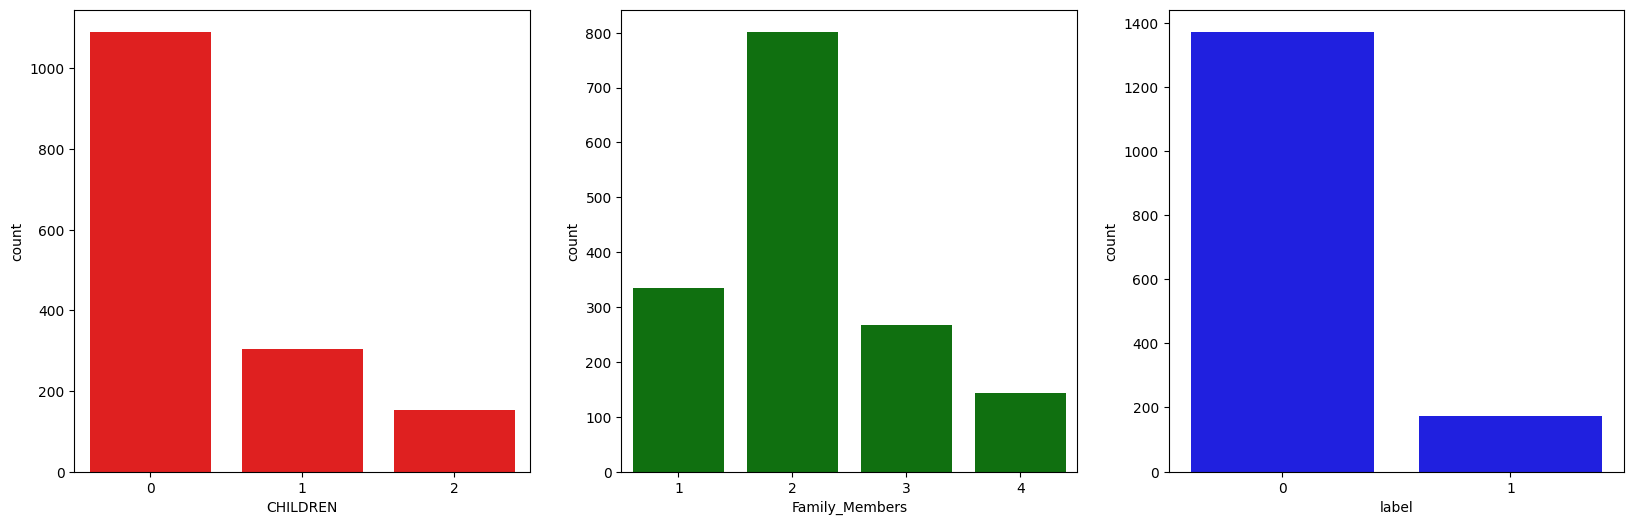

In [58]:
# count plot for columns with integer values

plt.figure(figsize=(20,6))                                   # Using figsize we can set the size of the plots
plt.subplot(1,3,1)                                           # Subplot enables us to plot many graphs at one place. Here we are plotting graphs with 1 row and 5 columns
sns.countplot(x = df1["CHILDREN"], color = 'r')              # Countplot for "CHILDREN" column using seaborn
plt.subplot(1,3,2)
sns.countplot(x = df1["Family_Members"], color = 'g')        # Countplot for "Family_Members" column using seaborn
plt.subplot(1,3,3)
sns.countplot(x = df1["label"], color = 'b')                 # Countplot for "label" column using seaborn



<Axes: xlabel='Propert_Owner', ylabel='count'>

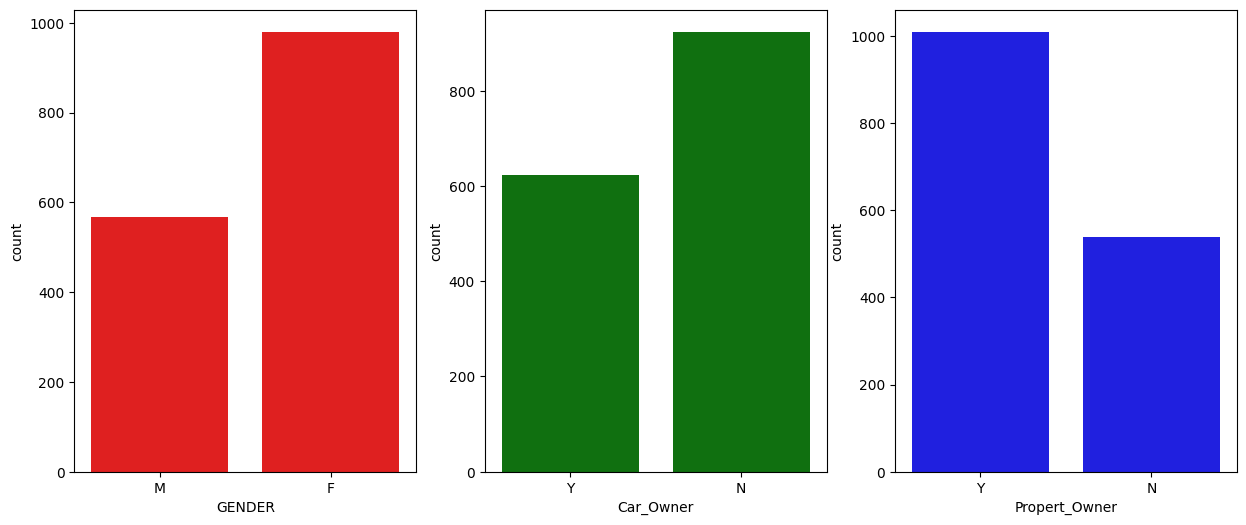

In [59]:
# countplot for categorical columns
plt.figure(figsize=(15,6))                                 # Using figsize we can set the size of the plots
plt.subplot(1,3,1)                                         # Subplot enables us to plot many graphs at one place. Here we are plotting graphs with 2 rows and 4 columns
sns.countplot(x = df1["GENDER"],color = 'r')               # countplot for "GENDER" column using seaborn
plt.subplot(1,3,2)
sns.countplot(x = df1["Car_Owner"], color = 'g')           # countplot for "Car_Owner" column using seaborn
plt.subplot(1,3,3)
sns.countplot(x = df1["Propert_Owner"], color = 'b')       # countplot for "Propert_Owner" column using seaborn




<Axes: xlabel='Marital_status', ylabel='count'>

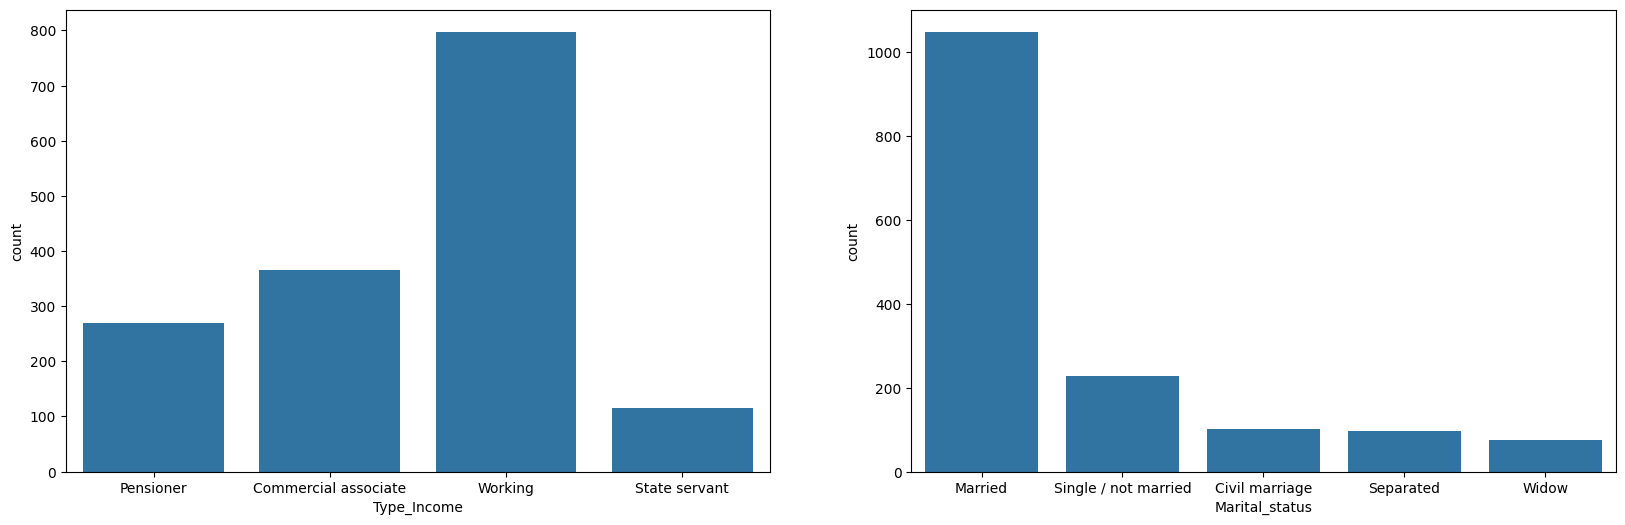

In [60]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.countplot(x = df1["Type_Income"])          # countplot for "Type_Income" column using seaborn
plt.subplot(1,2,2)
sns.countplot(x = df1["Marital_status"])       # countplot for "Marital_status" column using seaborn




<Axes: xlabel='EDUCATION', ylabel='count'>

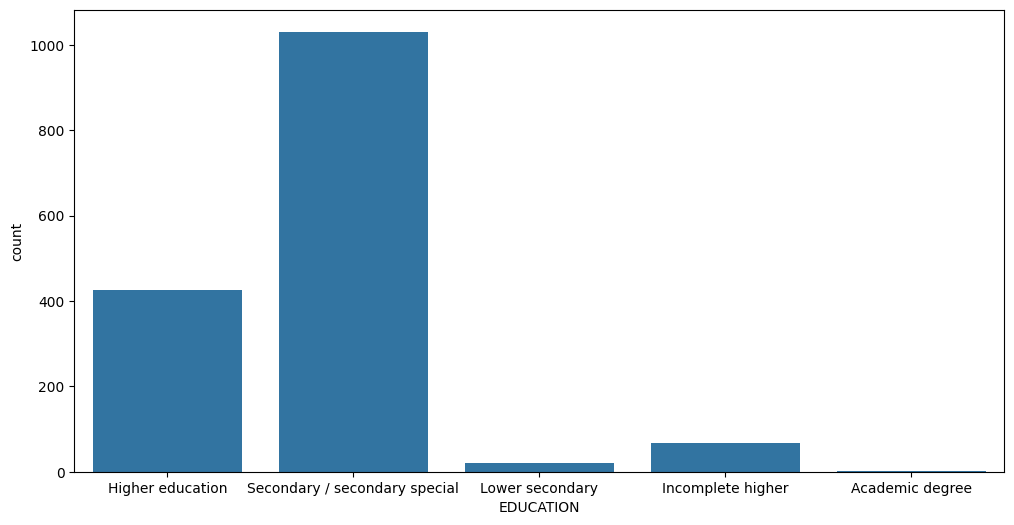

In [61]:
plt.figure(figsize=(12,6))
sns.countplot(x = df1["EDUCATION"])     # countplot for "EDUCATION" column using seaborn

<Axes: xlabel='Housing_type', ylabel='count'>

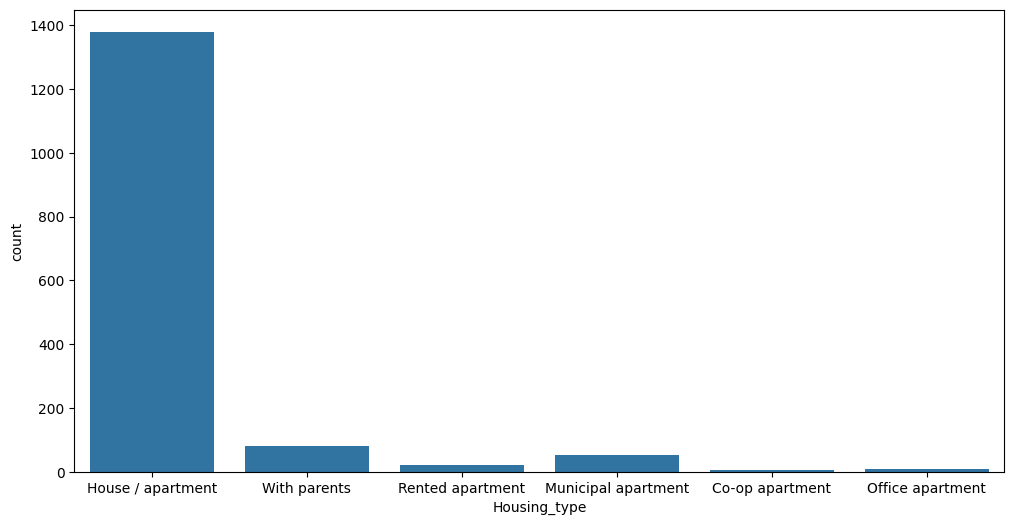

In [62]:
plt.figure(figsize=(12,6))
sns.countplot(x = df1["Housing_type"])  # countplot for "Housing_type " column using seaborn

<Axes: xlabel='Type_Occupation', ylabel='count'>

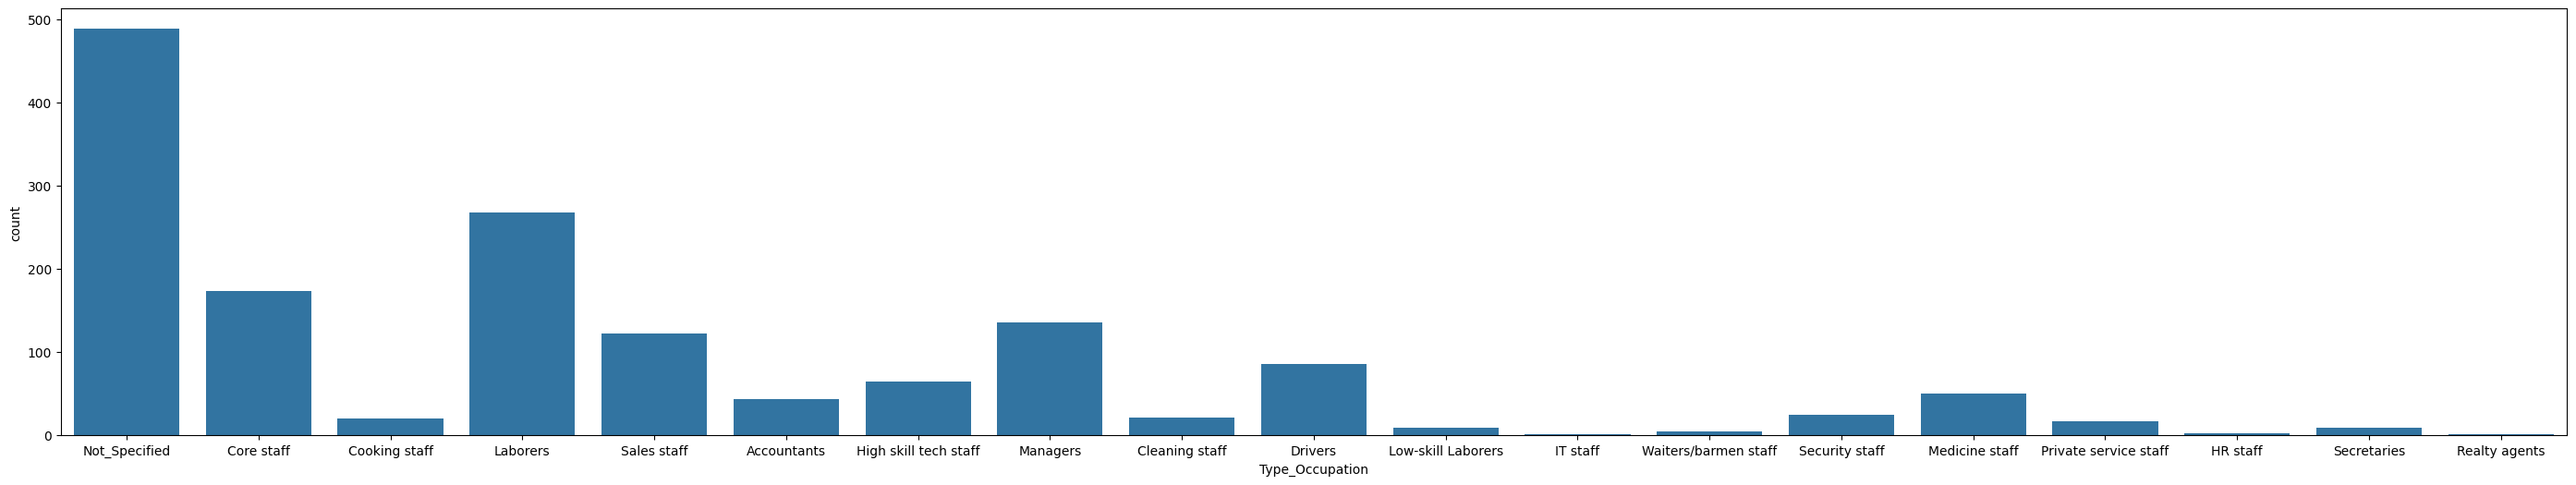

In [63]:
plt.figure(figsize=(35,6))
sns.countplot(x = df1["Type_Occupation"])      # countplot for "Type_Occupation" column using seaborn

# 2. Multivariate Analysis

In [64]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GENDER           1548 non-null   object 
 1   Car_Owner        1548 non-null   object 
 2   Propert_Owner    1548 non-null   object 
 3   CHILDREN         1548 non-null   int64  
 4   Annual_income    1548 non-null   float64
 5   Type_Income      1548 non-null   object 
 6   EDUCATION        1548 non-null   object 
 7   Marital_status   1548 non-null   object 
 8   Housing_type     1548 non-null   object 
 9   Age              1548 non-null   float64
 10  Employed_years   1548 non-null   float64
 11  Type_Occupation  1548 non-null   object 
 12  Family_Members   1548 non-null   int64  
 13  label            1548 non-null   int64  
dtypes: float64(3), int64(3), object(8)
memory usage: 181.4+ KB


In [65]:
df1['Annual_income'].max()

380250.0

Relationship between categorical and numerical columns

<Axes: xlabel='GENDER', ylabel='label'>

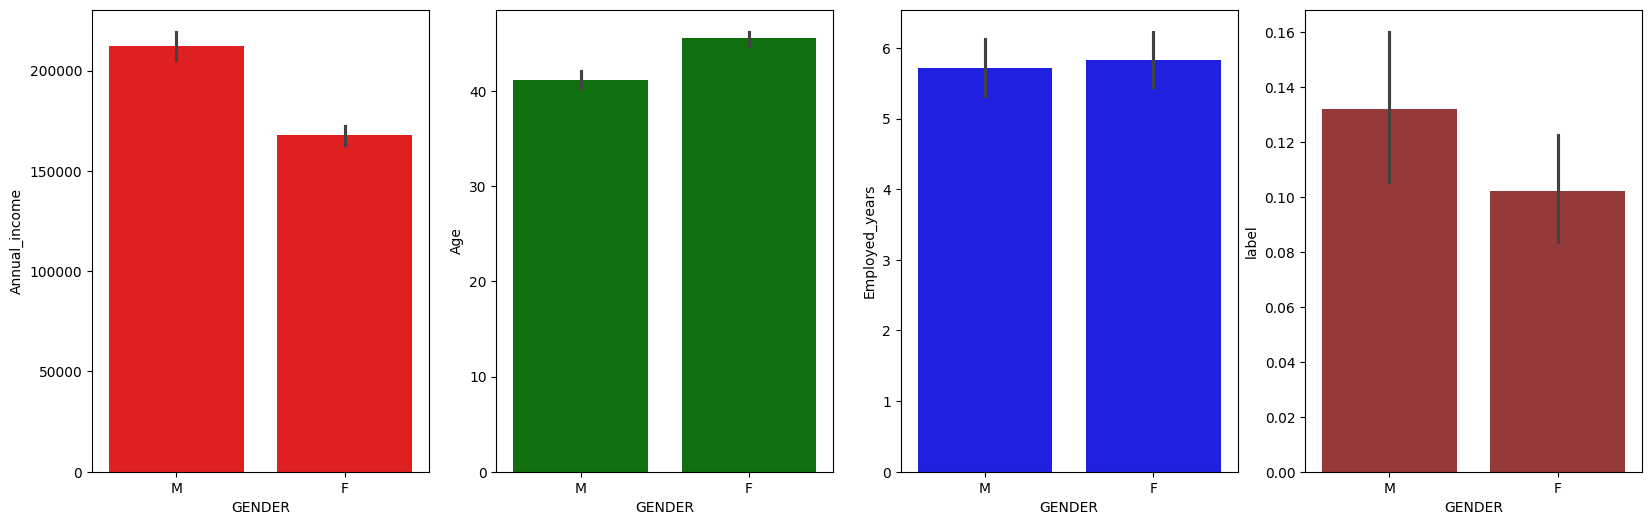

In [66]:
# Relationship of gender with other relevant numerical columns using barplot

plt.figure(figsize=(20,6))
plt.subplot(1,4,1)
sns.barplot(x = df1["GENDER"], y = df1['Annual_income'], color = 'r')                 # barplot for 'GENDER' and 'Annual_income' column using seaborn
plt.subplot(1,4,2)
sns.barplot(x = df1["GENDER"], y = df1['Age'], color = 'g')                           # barplot for 'GENDER' and 'Age' column using seaborn
plt.subplot(1,4,3)
sns.barplot(x = df1["GENDER"], y = df1['Employed_years'], color = 'b')                # barplot for 'GENDER' and 'Employed_years' column using seaborn
plt.subplot(1,4,4)
sns.barplot(x = df1["GENDER"], y = df1['label'], color = 'brown')                # barplot for 'GENDER' and 'label' column using seaborn


<Axes: xlabel='GENDER', ylabel='Employed_years'>

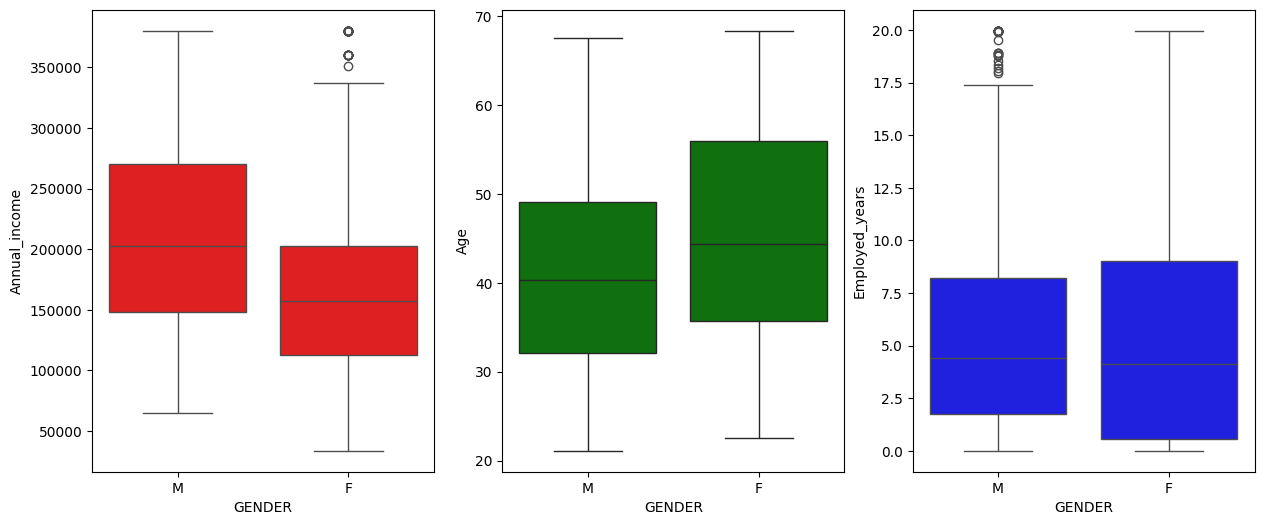

In [67]:
# Relationship of gender with other relevant numerical columns

plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
sns.boxplot(x = df1["GENDER"], y = df1['Annual_income'], color = 'r')                 # boxplot for 'GENDER' and 'Annual_income'column using seaborn
plt.subplot(1,3,2)
sns.boxplot(x = df1["GENDER"], y = df1['Age'], color = 'g')                           # boxplot for 'GENDER' and 'Age'column using seaborn
plt.subplot(1,3,3)
sns.boxplot(x = df1["GENDER"], y = df1['Employed_years'], color = 'b')                # boxplot for 'GENDER' and 'Employed_years'column using seaborn


From the above plots we can conclude that
 1. Highest income belongs to the males
 2. Highest age belongs to females
 3. Whereas, experience seems to be similiar for both males and females
 4. Count of females is more than males

Relationship between '' and car_Owner

GENDER  Propert_Owner
F       N                327
        Y                653
M       N                211
        Y                357
Name: GENDER, dtype: int64

---------------------

GENDER  Car_Owner
F       N            719
        Y            261
M       N            205
        Y            363
Name: GENDER, dtype: int64

---------------------


 GENDER  label
F       0        880
        1        100
M       0        493
        1         75
Name: GENDER, dtype: int64


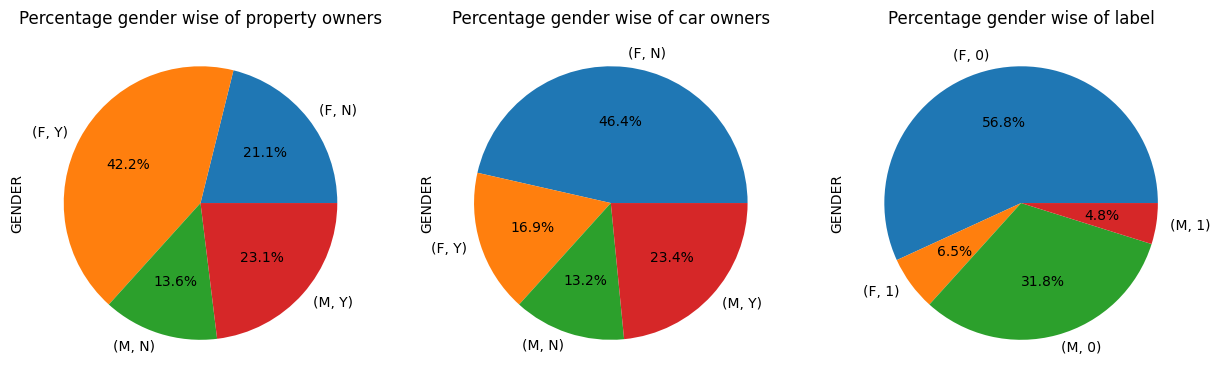

In [68]:
# Finding count of people with/without property grouped by gender

plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
df1.groupby(['GENDER', 'Propert_Owner'])['GENDER'].count().plot(kind = 'pie', autopct = '%1.1f%%' )
plt.title('Percentage gender wise of property owners')
print(df1.groupby(['GENDER', 'Propert_Owner'])['GENDER'].count())
print('\n---------------------\n')

# Finding count of people with/without car grouped by gender

plt.subplot(1,3,2)
df1.groupby(['GENDER', 'Car_Owner'])['GENDER'].count().plot(kind = 'pie', autopct = '%1.1f%%' )
plt.title('Percentage gender wise of car owners')
print(df1.groupby(['GENDER', 'Car_Owner'])['GENDER'].count())
print('\n---------------------\n')

# Finding count of people with/without approval by gender

plt.subplot(1,3,3)
df1.groupby(['GENDER', 'label'])['GENDER'].count().plot(kind = 'pie', autopct = '%1.1f%%' )
plt.title('Percentage gender wise of label')
print('\n',df1.groupby(['GENDER', 'label'])['GENDER'].count())




GENDER  Car_Owner  Propert_Owner
F       N          N                245
                   Y                474
        Y          N                 82
                   Y                179
M       N          N                 77
                   Y                128
        Y          N                134
                   Y                229
Name: GENDER, dtype: int64


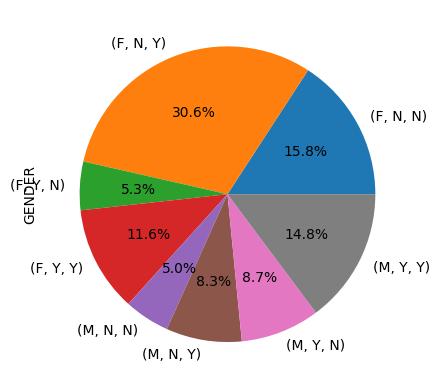

In [69]:
# Finding count of people with/without property and car grouped by gender

df1.groupby(['GENDER', 'Car_Owner', 'Propert_Owner'])['GENDER'].count().plot(kind = 'pie', autopct = '%1.1f%%' )
print(df1.groupby(['GENDER', 'Car_Owner', 'Propert_Owner'])['GENDER'].count())

GENDER  Marital_status      
F       Civil marriage           62
        Married                 630
        Separated                72
        Single / not married    143
        Widow                    73
M       Civil marriage           39
        Married                 419
        Separated                24
        Single / not married     84
        Widow                     2
Name: GENDER, dtype: int64

----------------------------

GENDER  EDUCATION                    
F       Academic degree                    2
        Higher education                 255
        Incomplete higher                 46
        Lower secondary                   14
        Secondary / secondary special    663
M       Higher education                 171
        Incomplete higher                 22
        Lower secondary                    7
        Secondary / secondary special    368
Name: GENDER, dtype: int64

----------------------------

GENDER  Type_Occupation      
F       Accountants   

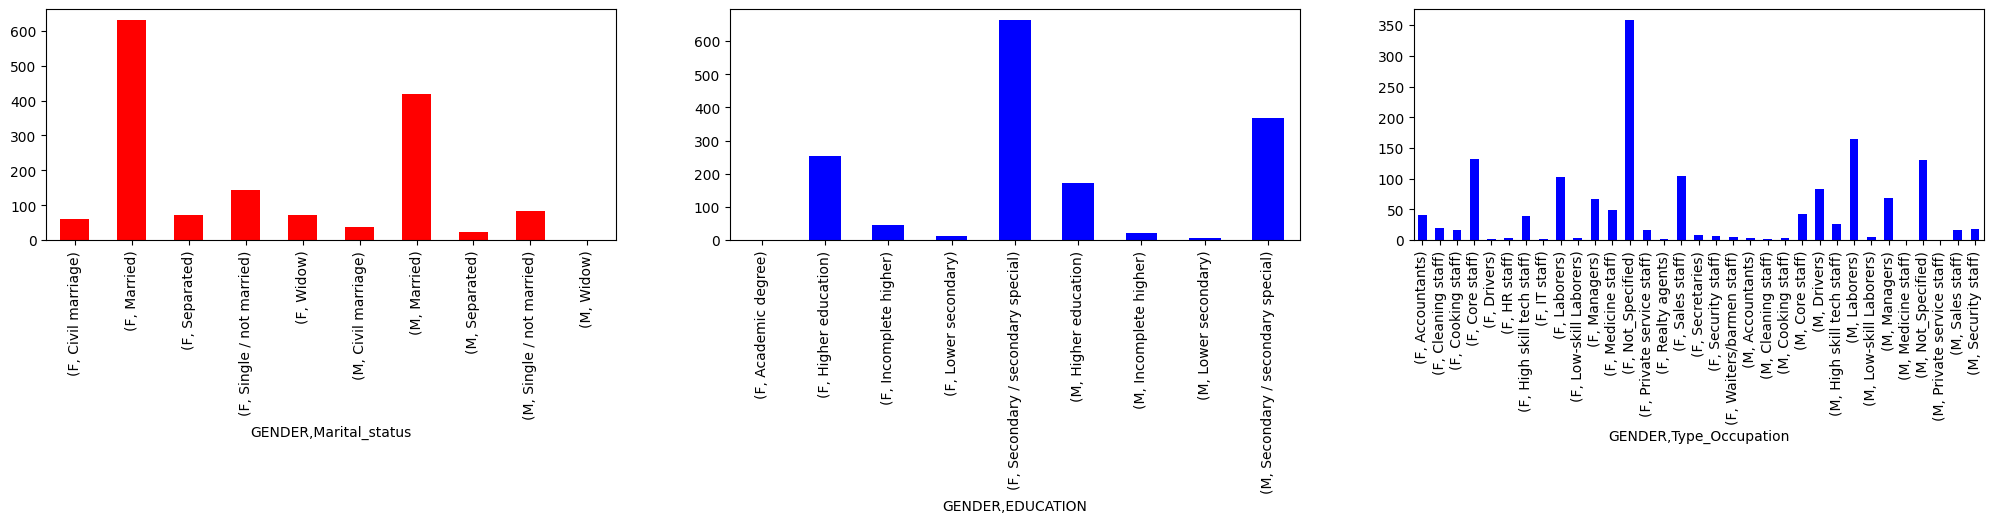

In [70]:
# count of gender grouped by marital status

plt.figure(figsize=(25,3))
plt.subplot(1,3,1)
df1.groupby(['GENDER', 'Marital_status'])['GENDER'].count().plot(kind = 'bar', color = 'red')
print(df1.groupby(['GENDER', 'Marital_status'])['GENDER'].count())
print('\n----------------------------\n')

# count of gender grouped by Education

plt.subplot(1,3,2)
df1.groupby(['GENDER', 'EDUCATION'])['GENDER'].count().plot(kind = 'bar', color = 'blue')
print(df1.groupby(['GENDER', 'EDUCATION'])['GENDER'].count())
print('\n----------------------------\n')

# count of gender grouped by Type of occupation

plt.subplot(1,3,3)
df1.groupby(['GENDER', 'Type_Occupation'])['GENDER'].count().plot(kind = 'bar', color = 'blue')
print(df1.groupby(['GENDER', 'Type_Occupation'])['GENDER'].count())

We can observe that count married people is more in both female and male.

Similarly,there is high percentage of both male and female with 'secondary/secondary special' category

Relationship of Annual income with other relevant columns

Type_Income
Commercial associate     78149700.0
Pensioner                40882900.5
State servant            23508000.0
Working                 142550622.0
Name: Annual_income, dtype: float64


<Axes: xlabel='label', ylabel='Annual_income'>

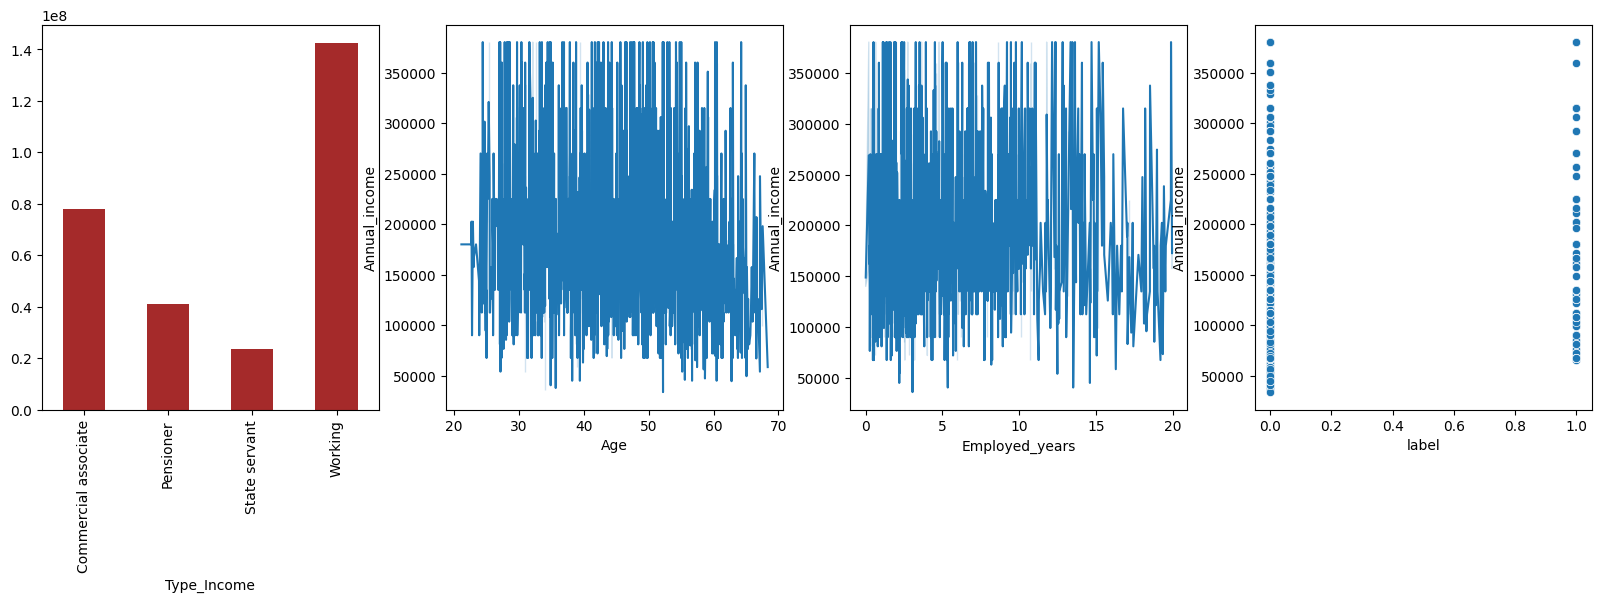

In [71]:
# Annual_income with Type_income
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
df1.groupby(['Type_Income'])['Annual_income'].sum().plot(kind = 'bar', color = 'brown')
print(df1.groupby(['Type_Income'])['Annual_income'].sum())

# Annual_income vs Age
plt.subplot(1,4,2)
sns.lineplot(x = df1['Age'], y = df1['Annual_income'])

# Annual_income vs Experience
plt.subplot(1,4,3)
sns.lineplot(x = df1['Employed_years'], y = df1['Annual_income'])

# Annual_income vs label
plt.subplot(1,4,4)
sns.scatterplot(x = df1['label'], y = df1['Annual_income'])




From the above graphs we can draw following conclusions:
1. Annual income of people with category 'working' has highest income
2. There is no straight forward relationship between annual income and age also
   between annual income and experience.
3. There seem to be no direct relationship between annual income and 'lable'
   column. **So we do not have enough evidence to accept the null hypothesis**

<Axes: xlabel='Family_Members', ylabel='Annual_income'>

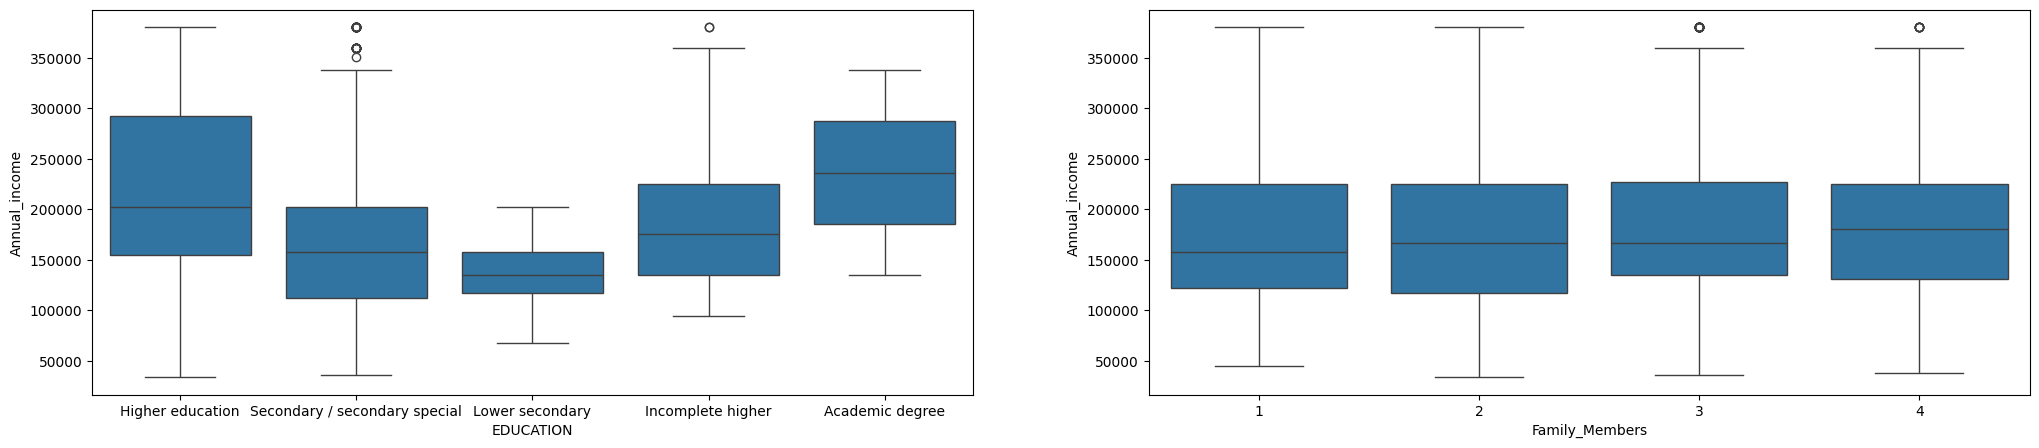

In [72]:
# box plot for annual income and education

plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
sns.boxplot(y ='Annual_income', x ="EDUCATION",data=df1)

# box plot for annual income and family members

plt.subplot(1,2,2)
sns.boxplot(x ='Family_Members', y ="Annual_income",data=df1)

<Axes: xlabel='Family_Members', ylabel='Annual_income'>

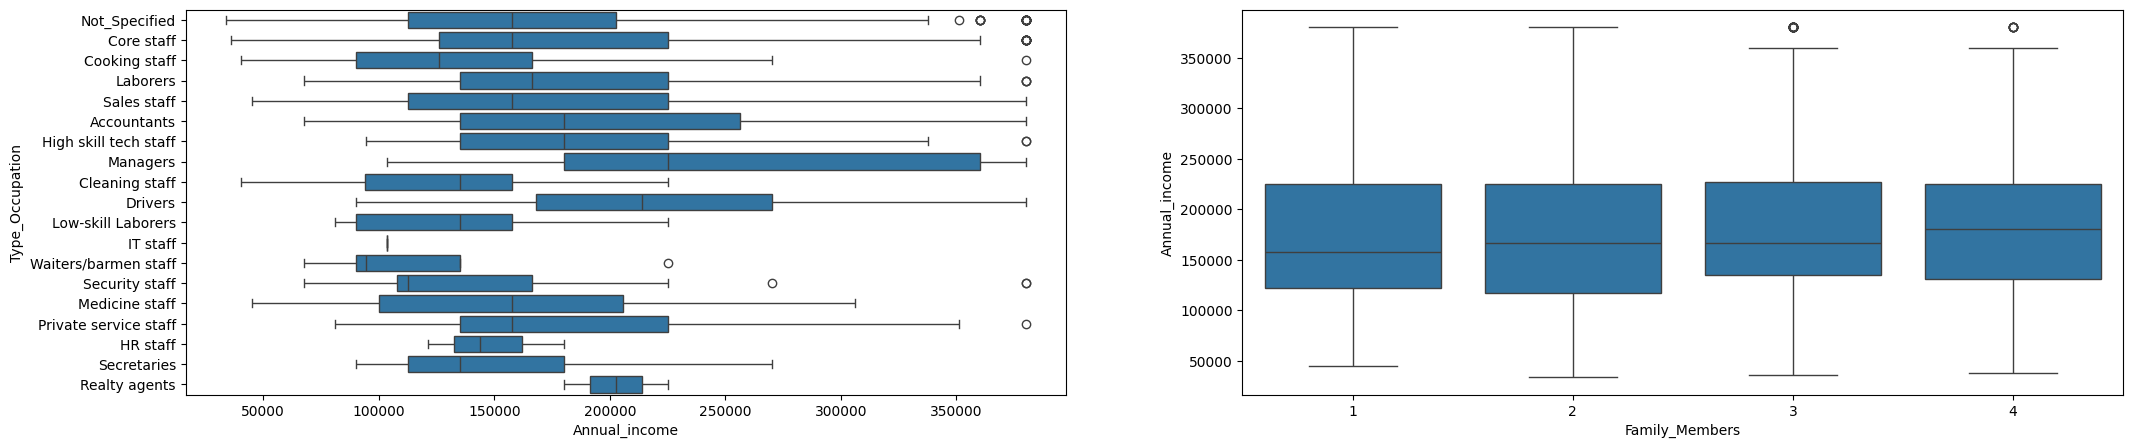

In [73]:
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
sns.boxplot(x ='Annual_income', y ="Type_Occupation",data=df1)

plt.subplot(1,2,2)
sns.boxplot(y ='Annual_income', x ="Family_Members",data=df1)

In [74]:
df1.head()

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Age,Employed_years,Type_Occupation,Family_Members,label
0,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51.430137,0.000000,Not_Specified,2,1
1,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.142466,1.605479,Not_Specified,2,1
2,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,43.946143,1.605479,Not_Specified,2,1
3,F,Y,N,0,166500.0,Commercial associate,Higher education,Married,House / apartment,37.142466,1.605479,Not_Specified,2,1
4,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.142466,1.605479,Not_Specified,2,1


Now that the null hypothesis can not be accepted we will look to analyze the relationship between other independent variable and target variable

label  Type_Income         
0      Commercial associate    315
       Pensioner               227
       State servant           110
       Working                 721
1      Commercial associate     50
       Pensioner                42
       State servant             6
       Working                  77
Name: label, dtype: int64

----------------------------

label  Type_Occupation      
0      Accountants               39
       Cleaning staff            20
       Cooking staff             17
       Core staff               151
       Drivers                   77
       HR staff                   3
       High skill tech staff     58
       Laborers                 240
       Low-skill Laborers         7
       Managers                 122
       Medicine staff            47
       Not_Specified            431
       Private service staff     17
       Realty agents              2
       Sales staff              112
       Secretaries                9
       Security staff         

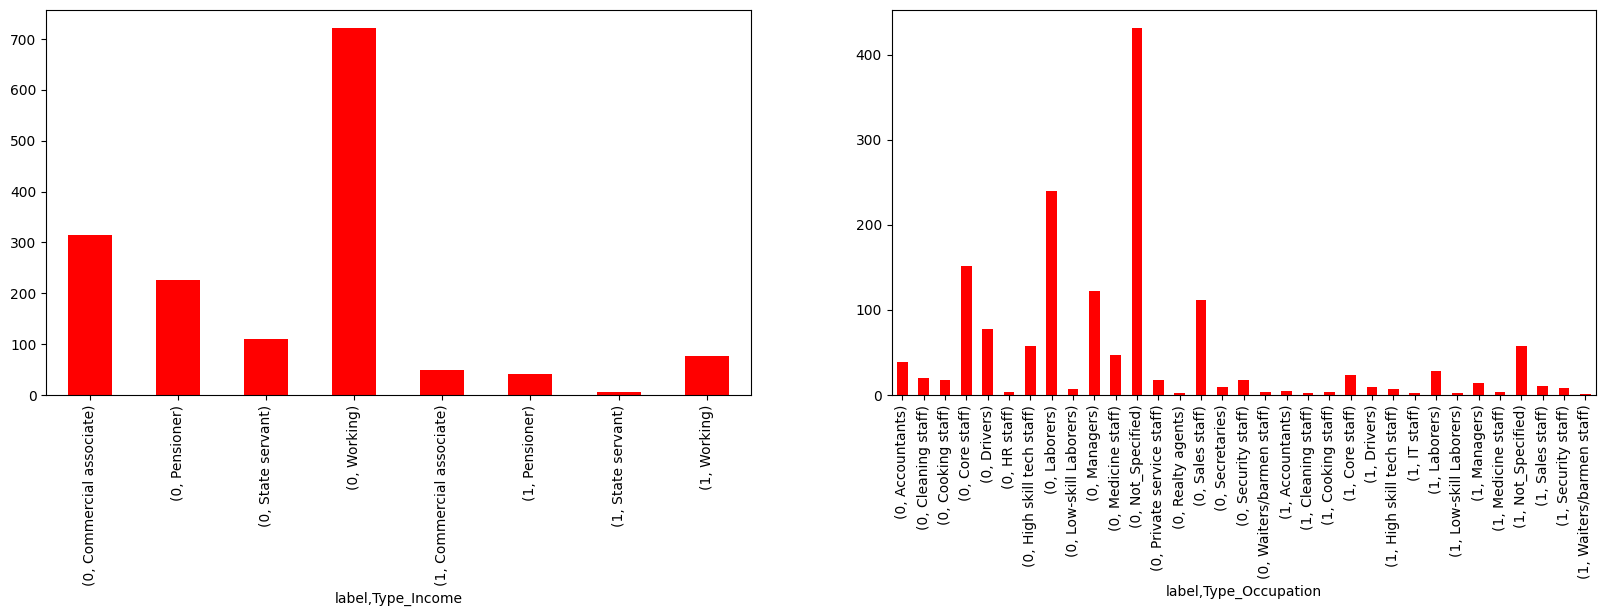

In [75]:
# relationship between type of income and label
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
df1.groupby(['label','Type_Income'])['label'].count().plot(kind = 'bar', color = 'red')
print(df1.groupby(['label','Type_Income'])['label'].count())
print('\n----------------------------\n')

# relationship between Type_Occupation and label
plt.subplot(1,2,2)
df1.groupby(['label','Type_Occupation'])['label'].count().plot(kind = 'bar', color = 'red')
print(df1.groupby(['label','Type_Occupation'])['label'].count())

From the above graphs we can conclude that:
1. Working people have highest number of approvals
2. In occupation, laborers have second highest number of approvals right after
   the category 'Not_Specified'.

label  EDUCATION                    
0      Academic degree                    2
       Higher education                 371
       Incomplete higher                 63
       Lower secondary                   15
       Secondary / secondary special    922
1      Higher education                  55
       Incomplete higher                  5
       Lower secondary                    6
       Secondary / secondary special    109
Name: label, dtype: int64

----------------------------

label  Marital_status      
0      Civil marriage           97
       Married                 935
       Separated                82
       Single / not married    192
       Widow                    67
1      Civil marriage            4
       Married                 114
       Separated                14
       Single / not married     35
       Widow                     8
Name: label, dtype: int64
label  CHILDREN
0      0           965
       1           269
       2           139
1      0           12

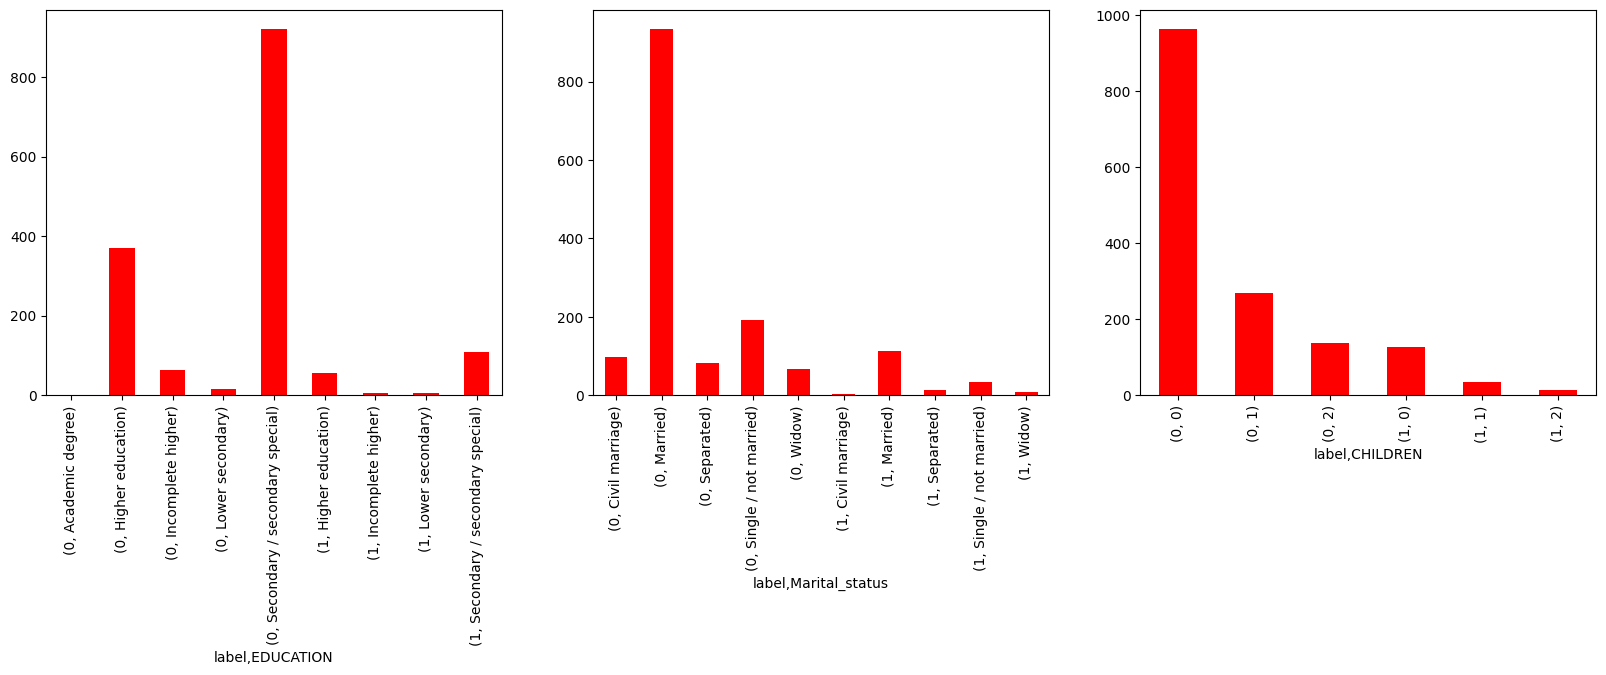

In [76]:
# relationship between type of education and label
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
df1.groupby(['label','EDUCATION'])['label'].count().plot(kind = 'bar', color = 'red')
print(df1.groupby(['label','EDUCATION'])['label'].count())
print('\n----------------------------\n')

# relationship between Maritsal status and label
plt.subplot(1,3,2)
df1.groupby(['label','Marital_status'])['label'].count().plot(kind = 'bar', color = 'red')
print(df1.groupby(['label','Marital_status'])['label'].count())

plt.subplot(1,3,3)
df1.groupby(['label','CHILDREN'])['label'].count().plot(kind = 'bar', color = 'red')
print(df1.groupby(['label','CHILDREN'])['label'].count())

As we have already observed that there are more marrried people with 'Secondary/secondary special' education status. It is obvious that they got more approvals.

<Axes: xlabel='Employed_years', ylabel='label'>

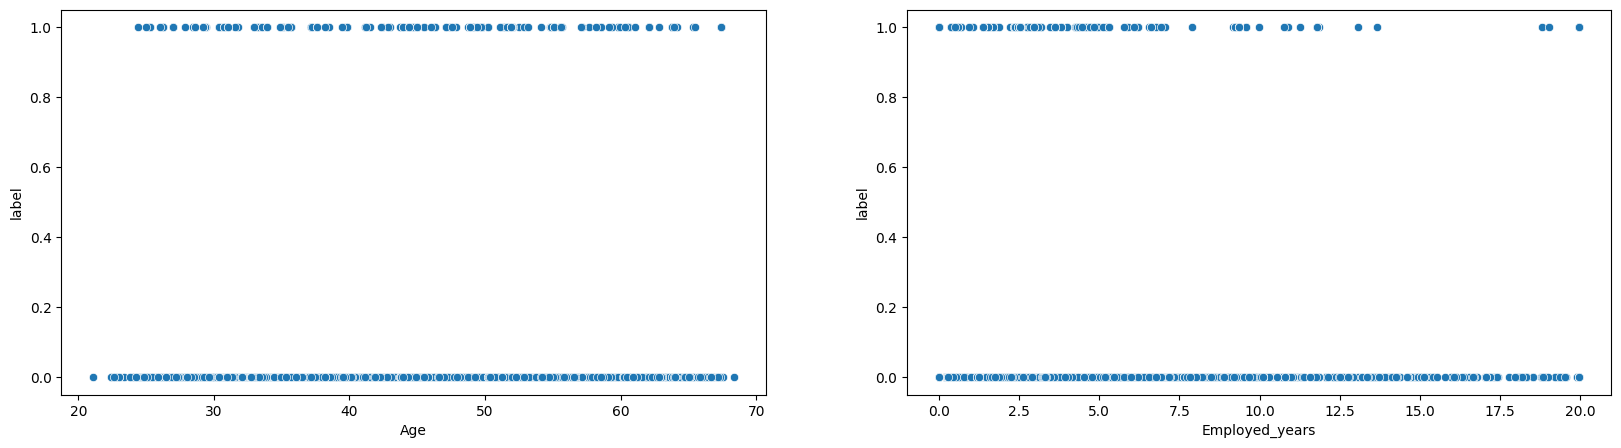

In [77]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.scatterplot(x = df1['Age'], y = df1['label'])

plt.subplot(1,2,2)
sns.scatterplot(x = df1['Employed_years'], y = df1['label'])

From above scatterplots we can conclude that
1. No straight forward relationship between age and label
2. No direct relationship between experience and lable except that after
   experience of approximately 7.5 years there are less number of non approvals

**From the EDA we could not found any strong relationship between individual independent variable and target variable.**

# **MACHINE LEARNING APPROACH**

Approach: We are going to train the dataset, first with Random Forest algorithm (RFA). It is primarily used for classification and regression tasks.

Reasons:
1. RFA creates multiple decision trees of the training dataset with bootstraped
   sampling. So it creates aggregate model of small models to improve accuracy.
2. Robustness of RFA
3. Reduces overfitting by introducing randomness in the tree construction
   process

After training with RFA we are going to train dataset again with 3 other models namely:
1. Logistic regression
2. XG boost
3. Decision tree

We will check accuracy of each model and find out most suitable model for our dataset

# **Feature engineering:**
**Encoding**

We are going to use nominal encoding for columns "GENDER","Car_Owner", "CHILDREN","Type_Income","Marital_status","Housing_type","Type_Occupation","Family_Members"

And ordinal encoding for column 'EDUCATION' as it has hierarchy

In [78]:
df2 = df1.copy()

In [79]:
# Nominal encoding

df1=pd.get_dummies(df1,columns=["GENDER","Car_Owner", "Propert_Owner", "CHILDREN","Type_Income","Marital_status","Housing_type","Type_Occupation","Family_Members"], drop_first=True)

In [80]:


df1['EDUCATION'].value_counts()

Secondary / secondary special    1031
Higher education                  426
Incomplete higher                  68
Lower secondary                    21
Academic degree                     2
Name: EDUCATION, dtype: int64

In [81]:
# ordinal encoding

d = {'Lower secondary':1, 'Secondary / secondary special':2, 'Incomplete higher':3, 'Higher education':4, 'Academic degree':5}
df1['EDUCATION'] = df1['EDUCATION'].map(d)


In [82]:
df1.head()

,Annual_income,EDUCATION,Age,Employed_years,label,GENDER_M,Car_Owner_Y,Propert_Owner_Y,CHILDREN_1,CHILDREN_2,...,Type_Occupation_Not_Specified,Type_Occupation_Private service staff,Type_Occupation_Realty agents,Type_Occupation_Sales staff,Type_Occupation_Secretaries,Type_Occupation_Security staff,Type_Occupation_Waiters/barmen staff,Family_Members_2,Family_Members_3,Family_Members_4
0,180000.0,4,51.430137,0.000000,1,1,1,1,0,0,...,1,0,0,0,0,0,0,1,0,0
1,315000.0,4,37.142466,1.605479,1,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,315000.0,4,43.946143,1.605479,1,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,166500.0,4,37.142466,1.605479,1,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,315000.0,4,37.142466,1.605479,1,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0


Splitting data into test and train

In [83]:
# spliting into independant and target variable

x = df1.iloc[:,0:-1]
y = df1.iloc[:,-1]



**Feature selection:**

we are going to use ***Recursive Feature Elimination*** (RFE) as a feature selection technique

In [84]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier


selector = RFE(estimator = RandomForestClassifier() , n_features_to_select=5, step=1)
selector = selector.fit(x, y)
selector.support_

array([False, False, False, False, False, False, False, False,  True,
        True, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True])

In [85]:
# Splitting the data into train and test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=40)

**Feature Scaling**

as it is classification problem we are going to use normalisation

In [86]:
# importing the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
rescale_x_train = scaler.fit_transform(x_train)
rescale_x_test = scaler.fit_transform(x_test)
print(rescale_x_train.shape)
print(rescale_x_test.shape)

(1083, 42)
(465, 42)


In [87]:
print(rescale_x_train)

[[0.22727273 0.25       0.86852471 ... 0.         0.         0.        ]
 [0.35714286 0.25       0.87920745 ... 0.         0.         0.        ]
 [0.38311688 0.75       0.32030317 ... 0.         1.         0.        ]
 ...
 [0.42207792 0.25       0.83217952 ... 0.         1.         0.        ]
 [0.42207792 0.25       0.63374314 ... 0.         1.         0.        ]
 [1.         0.75       0.41955121 ... 0.         0.         1.        ]]


In [88]:
normdf=pd.DataFrame(rescale_x_train,columns=x_train.columns)
normdf.head(5)

,Annual_income,EDUCATION,Age,Employed_years,label,GENDER_M,Car_Owner_Y,Propert_Owner_Y,CHILDREN_1,CHILDREN_2,...,Type_Occupation_Medicine staff,Type_Occupation_Not_Specified,Type_Occupation_Private service staff,Type_Occupation_Realty agents,Type_Occupation_Sales staff,Type_Occupation_Secretaries,Type_Occupation_Security staff,Type_Occupation_Waiters/barmen staff,Family_Members_2,Family_Members_3
0,0.227273,0.25,0.868525,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.357143,0.25,0.879207,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.383117,0.75,0.320303,0.080399,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.422078,0.75,0.221473,0.025108,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.357143,0.25,0.946407,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Model Building**

# **Model 1: Random Forest**

In [89]:
# Importing RandomForestClassifier from sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
rf = RandomForestClassifier()
rf.fit(rescale_x_train,y_train)


RandomForestClassifier()

In [90]:
# Calculating accuracy of model

y_pred = rf.predict(rescale_x_test)
print("rf training set:",rf.score(rescale_x_train, y_train))
print("rf testing set:",rf.score(rescale_x_test, y_test))
print("Random Forest classifier has accuracy of: ", rf.score(rescale_x_test, y_test))
# Evaluate the confusion_matrix
print(confusion_matrix(y_test, y_pred))

rf training set: 1.0
rf testing set: 0.9978494623655914
Random Forest classifier has accuracy of:  0.9978494623655914
[[415   0]
 [  1  49]]


**Cross Validation for random forest using shufflesplit method**



In [91]:
from sklearn.model_selection import ShuffleSplit
model=RandomForestClassifier()
ssplit=ShuffleSplit(n_splits=10,test_size=0.20)
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,x,y,cv=ssplit)
print(results)
print(np.mean(results))

[1.         0.99677419 0.99354839 1.         1.         1.
 0.99677419 1.         0.99677419 1.        ]
0.9983870967741936


# **Model 2: Logistic Regression**

In [92]:
# importing the LogisticRegression
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(random_state=0)
logreg.fit(rescale_x_train, y_train)

LogisticRegression(random_state=0)

In [93]:
#Importing scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
y_pred = logreg.predict(rescale_x_test)
print("logistic regression training set:",logreg.score(rescale_x_train, y_train))
print("logistic regression testing set:",logreg.score(rescale_x_test, y_test))
print("Accuracy of logistic regression classifier: ", accuracy_score(y_test,y_pred))
print("Precision score of logistic regression classifier: ", precision_score(y_test,y_pred))

print(confusion_matrix(y_test,y_pred))

logistic regression training set: 1.0
logistic regression testing set: 1.0
Accuracy of logistic regression classifier:  1.0
Precision score of logistic regression classifier:  1.0
[[415   0]
 [  0  50]]


Cross validation for Logistic regression

In [94]:
# cross validation
from sklearn.model_selection import ShuffleSplit
model= LogisticRegression()
ssplit=ShuffleSplit(n_splits=10,test_size=0.20)
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,x,y,cv=ssplit)
print(results)
print(np.mean(results))

[0.91612903 0.99354839 0.90322581 0.92258065 0.91935484 0.91290323
 0.91290323 0.88709677 0.88709677 0.91935484]
0.9174193548387096


# **Model 3: Decision Tree**

In [95]:
# decision tree classification  without rescaled
from sklearn.tree import DecisionTreeClassifier
classification = DecisionTreeClassifier()
classification = classification.fit(x_train,y_train)


In [96]:
y_pred = classification.predict(x_test)
print("decision tree training set:",classification.score(x_train, y_train))
print("decision tree testing set:",classification.score(x_test, y_test))
print("Accuracy:", accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

decision tree training set: 1.0
decision tree testing set: 1.0
Accuracy: 1.0
[[415   0]
 [  0  50]]


Cross validation for decision tree

In [97]:
# cross validation
from sklearn.model_selection import ShuffleSplit
model= DecisionTreeClassifier()
ssplit=ShuffleSplit(n_splits=10,test_size=0.20)
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,x,y,cv=ssplit)
print(results)
print(np.mean(results))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1.0


# **Model 4: XG Boost**

In [98]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
xg=XGBClassifier()
xg=xg.fit(x_train,y_train)


In [99]:
y_pred=xg.predict(rescale_x_test)
print("xg training set:",xg.score(rescale_x_train, y_train))
print("xg testing set:",xg.score(rescale_x_test, y_test))
print("Accuracy:", accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

xg training set: 1.0
xg testing set: 1.0
Accuracy: 1.0
[[415   0]
 [  0  50]]


# **Conclusion**

From the accuracy of all 4 models we can say that performance of all the models is similar. All models have accuracy of nearly 100%.

Steps performed:

1. Data understanding
2. Data Preprocessing
3. EDA
4. Feature engineeing
5. ML model developement

 ------------------------------------------------------------------------------

# **SQL QUERRIES**

In [100]:
df2.insert(0, 'Ind_ID', df['Ind_ID']) # inserting Ind_ID column in dataset the is going to be used for sql query as we have removed it while data cleaning


In [101]:
df2.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Age,Employed_years,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51.430137,0.000000,Not_Specified,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.142466,1.605479,Not_Specified,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,43.946143,1.605479,Not_Specified,2,1
3,5009749,F,Y,N,0,166500.0,Commercial associate,Higher education,Married,House / apartment,37.142466,1.605479,Not_Specified,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.142466,1.605479,Not_Specified,2,1


In [110]:
# importing duckdb to use sql querries in python

import duckdb
conn = duckdb.connect()

In [111]:
conn.register('df2',df2) # connecting to cleaned table

1. Group the customers based on their income type and find the average of their annual income.



In [112]:
conn.execute('select Type_Income, avg(Annual_income) from df2 group by Type_Income').fetchdf()

,Type_Income,avg(Annual_income)
0,Pensioner,151981.042751
1,Working,178634.864662
2,State servant,202655.172414
3,Commercial associate,214108.767123


2. Find the female owners of cars and property.

In [122]:
conn.execute("select Ind_ID, GENDER, Propert_Owner from df2 where GENDER = 'F' and Propert_Owner = 'Y' and Car_Owner = 'Y'").fetchdf()

,Ind_ID,GENDER,Propert_Owner
0,5018498,F,Y
1,5018501,F,Y
2,5018503,F,Y
3,5024213,F,Y
4,5036660,F,Y
...,...,...,...
174,5048458,F,Y
175,5023719,F,Y
176,5033520,F,Y
177,5024049,F,Y


3. Find the male customers who are staying with their families.

In [120]:
conn.execute("select Ind_ID, GENDER, Family_Members from df2 where GENDER = 'M' and Family_Members > 0").fetchdf()

,Ind_ID,GENDER,Family_Members
0,5008827,M,2
1,5010864,M,3
2,5010868,M,3
3,5010869,M,1
4,5021303,M,3
...,...,...,...
563,5096856,M,2
564,5090942,M,2
565,5118268,M,3
566,5115992,M,4


4. Please list the top five people having the highest income.

In [124]:
conn.execute('select Ind_ID, Annual_income from df2 order by Annual_income desc limit 5').fetchdf()

,Ind_ID,Annual_income
0,5010864,380250.0
1,5010868,380250.0
2,5010869,380250.0
3,5021303,380250.0
4,5024213,380250.0


5. How many married people are having bad credit?

In [126]:
conn.execute("select Marital_status, count(Marital_status) from df2 where label = 1 and Marital_status in ('Married', 'Civil marriage') group by Marital_status").fetchdf()

,Marital_status,count(Marital_status)
0,Married,114
1,Civil marriage,4


Total 118 married people are having bad credit

6. What is the highest education level and what is the total count?

In [131]:
conn.execute('select EDUCATION,count(Ind_ID) from df2 group by EDUCATION').fetchdf()

,EDUCATION,count(Ind_ID)
0,Incomplete higher,68
1,Academic degree,2
2,Higher education,426
3,Secondary / secondary special,1031
4,Lower secondary,21


highest number of educarion level in 'Secondary/secondary special and count is 1031

7. Between married males and females, who is having more bad credit?

In [132]:
conn.execute("select gender, count(label) from df2 where label = 1 and Marital_status in ('Married', 'Civil marriage') group by gender").fetchdf()

,GENDER,"count(""label"")"
0,M,54
1,F,64


Between married males and females, females are having bad credit